***
# <font color = 'brown'> Lead Scoring Case Study </font>
***

## <font color = 'brown'> Problem Statement </font>
***

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

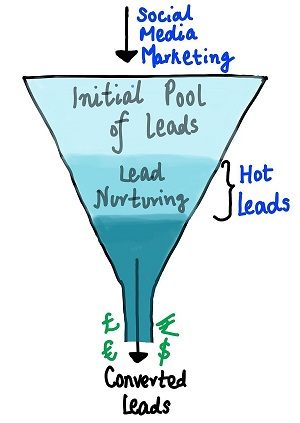

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. 
<p>
<b>The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.<b>

### <font color = 'brown'> <u>Data</u>: </font>

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. <p>Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

### <font color = 'brown'> <u>Goals of the Case Study</u>: </font>

There are quite a few goals for this case study:

<b>1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.</b>
<br>

<b>2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.</b>

***
## <font color = 'brown'> Case Study Code </font>
***

In [1]:
# Import Libraries
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Handle Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset 'Leads.csv'
Lead_Score = pd.read_csv("Leads.csv")

## <font color = 'brown'><u>Data Overview</u>: </font>

In [3]:
# Data table
Lead_Score.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,25f52229-3a84-47f2-bc3d-276e9131481c,582469,Landing Page Submission,Direct Traffic,No,No,0,4.0,709,2.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
1,559625ff-3a83-42d4-86a2-63691caaf8df,626438,Lead Add Form,Reference,No,No,1,NaN,636,NaN,...,No,Potential Lead,Mumbai,NaN,NaN,NaN,NaN,No,No,Modified
2,268a0974-b8a5-46ea-9ec4-99d7e2935459,624544,API,Organic Search,No,No,1,6.0,1401,2.0,...,No,Potential Lead,Mumbai,NaN,NaN,NaN,NaN,No,No,Email Opened


In [4]:
# Dataset information overview
Lead_Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'> No discrepancy found in datatypes </font> </b>
***

In [5]:
# Shape and Size of data
print("Data Shape:",Lead_Score.shape)
print("Data Size:",Lead_Score.size)

Data Shape: (9240, 37)
Data Size: 341880


***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'> Total 9240 rows and 37 columns are contained in lead dataset </font></b>
***

In [6]:
# Data Description
Lead_Score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'> From above description it can be inferred that there are missing values present in the dataset. </font></b>
***

***
## <font color = 'brown'>DATA CLEANING:</font>
***

## <font color='brown'> 1) <u>Handling 'Select' option</u>:</font> 
***
<p> 
<b><font color= 'darkslategray'> Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value, since the customers did not choose an specific options leaving entry as 'select'. Hence, it needs to be converted into "Null Values'. </font></b>

In [7]:
# Convert 'Select' values to NaN in all coulumns.
Lead_Score = Lead_Score.replace('Select', np.nan)

## <font color = 'brown'><u>Handling Null Values</u>: </font>

In [8]:
# Finding the null percentages across columns
(round(Lead_Score.isnull().sum()/len(Lead_Score.index),2)*100).sort_values()

Prospect ID                                       0.0
I agree to pay the amount through cheque          0.0
Get updates on DM Content                         0.0
Update me on Supply Chain Content                 0.0
Receive More Updates About Our Courses            0.0
Through Recommendations                           0.0
Digital Advertisement                             0.0
Newspaper                                         0.0
X Education Forums                                0.0
A free copy of Mastering The Interview            0.0
Magazine                                          0.0
Search                                            0.0
Newspaper Article                                 0.0
Last Notable Activity                             0.0
Total Time Spent on Website                       0.0
Converted                                         0.0
Do Not Call                                       0.0
Do Not Email                                      0.0
Lead Number                 

<b><font color ='brown'> Note: </font> <font color= 'darkslategray'> Null values present in 17 columns. Dropping the columns with missing values greater than or equal to 40% . </font></b>

## <font color = 'brown'> 1) <u>Handling Columns with null values greater than 40%</u>: </font>

In [9]:
# Drop the columns with missing values greater than to 40% .
Lead_Score = Lead_Score.drop(columns=['How did you hear about X Education',
                                  'Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index',
                                  'Asymmetrique Profile Index',
                                  'Asymmetrique Activity Score',
                                  'Asymmetrique Profile Score'])

In [10]:
# Null percentages post removing the above columns
(round(Lead_Score.isnull().sum()/len(Lead_Score.index),2)*100).sort_values()

Prospect ID                                       0.0
I agree to pay the amount through cheque          0.0
Get updates on DM Content                         0.0
Update me on Supply Chain Content                 0.0
Receive More Updates About Our Courses            0.0
Through Recommendations                           0.0
Digital Advertisement                             0.0
Newspaper                                         0.0
X Education Forums                                0.0
Newspaper Article                                 0.0
Magazine                                          0.0
Search                                            0.0
A free copy of Mastering The Interview            0.0
Last Notable Activity                             0.0
Total Time Spent on Website                       0.0
Converted                                         0.0
Do Not Call                                       0.0
Do Not Email                                      0.0
Lead Source                 

## <font color = 'brown'> 2) <u>Handling columns with null values less than or equal to 40%</u>: </font>

***
### <b><font color ='brown'> 2.1) 'Specialization': </font> <font color= 'darkslategray'>37% missing values </font></b>
***

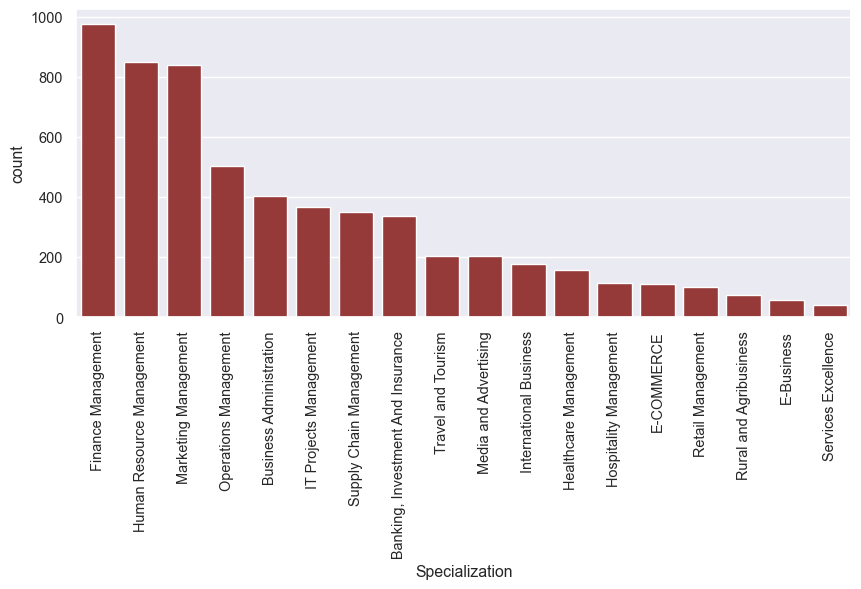

In [11]:
# Graphical representation of "Specialization" column 
plt.figure(figsize=(10,4))
sns.set(font_scale = 0.95)
sns.countplot(Lead_Score['Specialization'], color = 'brown', order = Lead_Score['Specialization'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'> Specialization column has 37% null values, which might be due to following reason: </font>

<ul> <font color= 'darkslategray'>  
    <li>Person is a student</li>
    <li>Person does not have any specialization</li>
    <li>Relevant option not avaiable</li>
</font> </ul>
<p>
<font color= 'darkslategray'><b>Hence, we can create another category 'Others' to fill the missing values in 'Specialization' column.</b></font>

***

In [12]:
# Create another category 'Others' to fill the missing values in 'Specialization' column.
Lead_Score['Specialization'] = Lead_Score['Specialization'].replace(np.nan, 'Others')

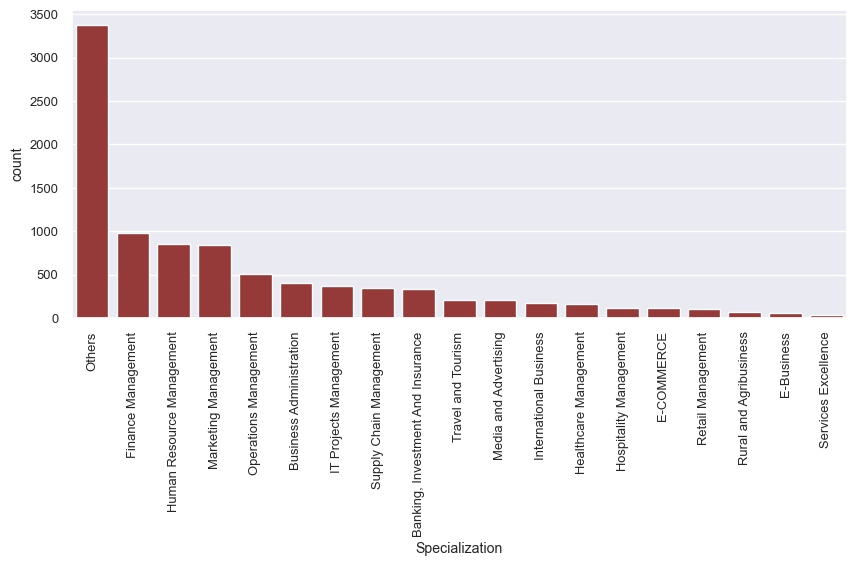

In [13]:
# Graphical representation of "Specialization" column post altering 'null values' 
plt.figure(figsize=(10,4))
sns.set(font_scale = 0.85)
sns.countplot(Lead_Score['Specialization'], color = 'brown',order = Lead_Score['Specialization'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

***
### <b><font color ='brown'> 2.2) 'Tags': </font> <font color= 'darkslategray'>36% missing values </font></b>
***

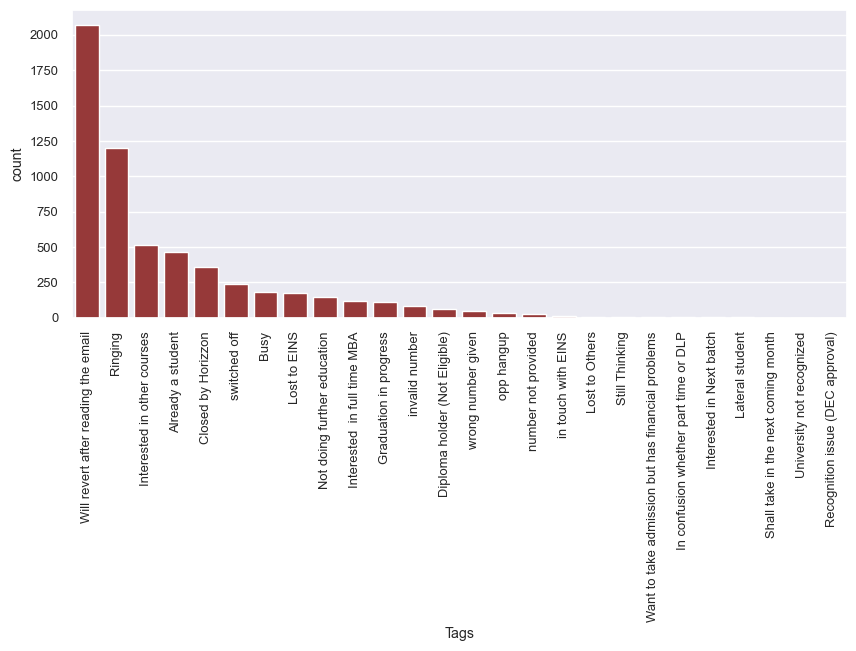

In [14]:
# Graphical representation of "Tag column" column 
plt.figure(figsize=(10,4))
sns.set(font_scale = 0.85)
sns.countplot(Lead_Score['Tags'], color = 'brown',order = Lead_Score['Tags'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>Imputing the null values in "Tags" column with the value 'Will revert after reading the email, since it is the most used option.</font>
***

In [15]:
# Imputing the null values as 'Will revert after reading the email' 'Tags' column with 
Lead_Score['Tags'] = Lead_Score['Tags'].replace(np.nan,'Will revert after reading the email')

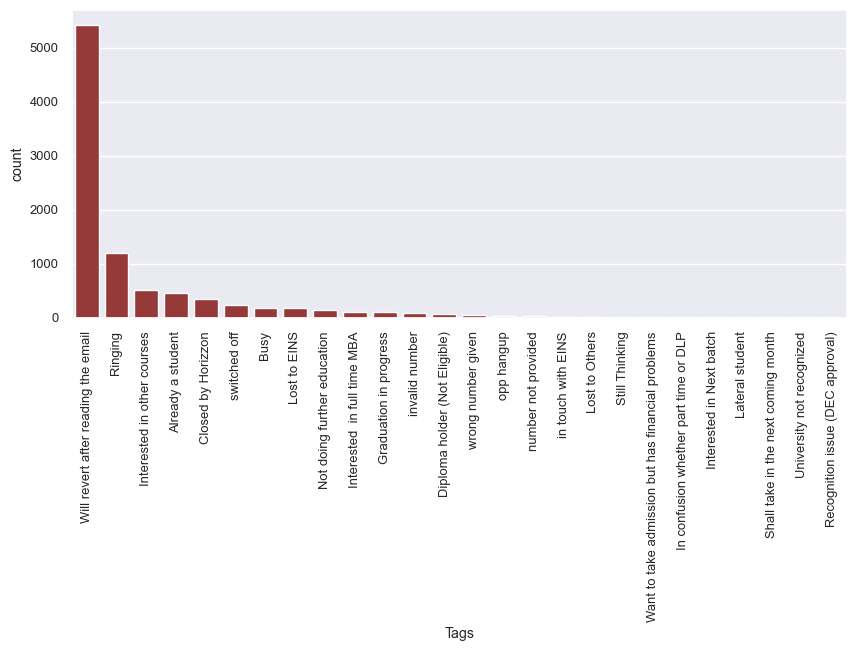

In [16]:
# Graphical representation of "Tag column" column post imputing
plt.figure(figsize=(10,4))
sns.set(font_scale = 0.85)
sns.countplot(Lead_Score['Tags'], color = 'brown',
             order = Lead_Score['Tags'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

***
### <b><font color ='brown'> 2.3) 'What matters most to you in choosing a course': </font> <font color= 'darkslategray'>29% missing values </font></b>
***

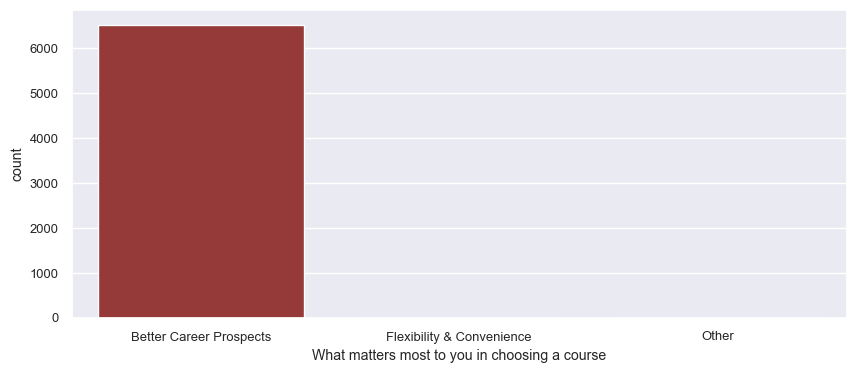

In [17]:
# Graphical representation of "Tag" column 
plt.figure(figsize=(10,4))
sns.set(font_scale = 0.85)
sns.countplot(Lead_Score['What matters most to you in choosing a course'], color = 'brown')
plt.show()

In [18]:
# Checking value for the above column for better understanding
round(Lead_Score['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [19]:
# Dropping this column 
Lead_Score = Lead_Score.drop('What matters most to you in choosing a course',axis=1)

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>Since the above column has only one set of values, hence we can remove this coulumn due to the lack of any insight out of it</font>
***

***
### <b><font color ='brown'> 2.4) 'What is your current occupation': </font> <font color= 'darkslategray'>29% missing values </font></b>
***

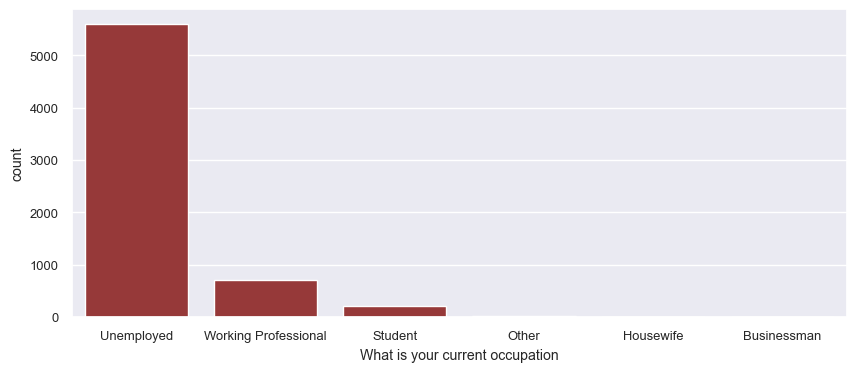

In [20]:
# Graphical representation of "Tag" column 
plt.figure(figsize=(10,4))
sns.set(font_scale = 0.85)
sns.countplot(Lead_Score['What is your current occupation'], color = 'brown',
             order = Lead_Score['What is your current occupation'].value_counts().index)
plt.show()

In [21]:
# Checking value for the above column for better understanding:
round(Lead_Score['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [22]:
# Imputing the null data in the 'What is your current occupation' column with 'Unemployed'
Lead_Score['What is your current occupation'] = Lead_Score['What is your current occupation'].replace(np.nan,'Unemployed')

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>Since the above column has 'Unemployed' option selected mostly, hence we can assign 'Unemployed' for the null values</font>
***

***
### <b><font color ='brown'> 2.5) 'Country': </font> <font color= 'darkslategray'>27% missing values </font></b>
***

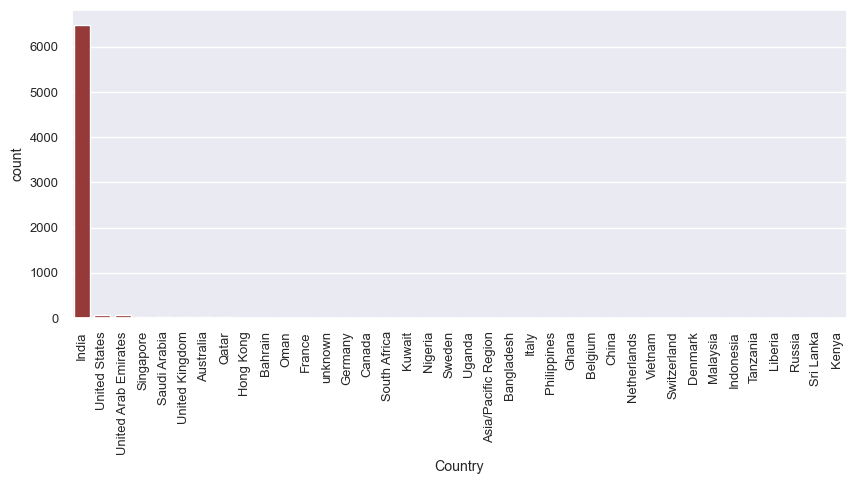

In [23]:
# Graphical representation of "Tag" column 
plt.figure(figsize=(10,4))
sns.set(font_scale = 0.85)
sns.countplot(Lead_Score['Country'], color = 'brown', order = Lead_Score['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [24]:
# Replacing the missing data in the 'Country' column with 'India'
Lead_Score['Country'] = Lead_Score['Country'].replace(np.nan,'India')

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>'Country' column is vital for analysing possibility lead, however the data points are inclined towards "India". Hence, imputing null values with "India"</font>
***

***
### <b><font color ='brown'>2.6) 'City': </font> <font color= 'darkslategray'>40% missing values </font></b>
***

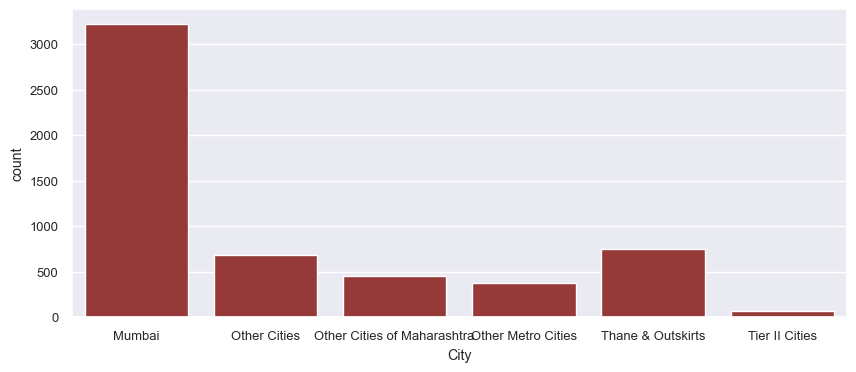

In [25]:
# Graphical representation of "Tag" column 
plt.figure(figsize=(10,4))
sns.set(font_scale = 0.85)
sns.countplot(Lead_Score['City'], color = 'brown')
plt.show()

In [26]:
# Checking value for the above column for better understanding:
round(Lead_Score['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [27]:
# Count of null values in "city" column
print("City Column Null Value Count:",Lead_Score['City'].isnull().sum())
print("Shape of Lead_Score:",Lead_Score.shape)

City Column Null Value Count: 3669
Shape of Lead_Score: (9240, 29)


In [28]:
# Imputing the missing data in the 'City' column with 'Mumbai'
Lead_Score['City'] = Lead_Score['City'].replace(np.nan,'Other Cities')

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>Since, 3669 values are missing out of 9240 from 'City' column hence imputing null values to 'Other Cities' to generalize the values,as it seem to be the best fit </font>
***

## <font color = 'brown'>3) <u>Handling columns with null values as 1%</u>: </font>

In [29]:
# Dropping the rows with null values as 1%
Lead_Score.dropna(inplace = True)

## <font color = 'brown'><u>Re-checking Null Count</u> </font>
***

In [30]:
# Finding the null percentages across columns post data cleaning
(round(Lead_Score.isnull().sum()/len(Lead_Score.index),2)*100).sort_values()

Prospect ID                                 0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
Search                                      0.0
Specialization                              0.0
Country                                     0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                             

In [31]:
# Percentage of rows remaining post dropping null row out of initial row count
print("Rows Retained (%):",round(((len(Lead_Score.index)/9240)*100),2))

Rows Retained (%): 98.2


***
<b><font color ='brown'> Note: </font> 
<font color= 'darkslategray'><br>1. No remaining missing/null values left in the "Lead_Score" dataframe.
<br>2. Moreover, 98.2 % data is still retained post droping the null rows which is significantly high. </font></b>
***

***
## <font color = 'brown'>EXPLORATORY DATA ANALYSIS:</font>
***

## <font color = 'brown'><u>Handling Duplicate Values</u>: </font>
***

In [32]:
# Checking duplicate values (rows) in lead_score data set
Lead_Score[Lead_Score.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>No duplicate values (rows) found in the "Lead_Score" data set</font></b>
***

***
## <font color = 'brown'>UNIVARIATE AND BIVARIATE ANALYSIS:</font>
***

***
### <b><font color ='brown'> 1) 'Converted' Column: </font> <font color= 'darkslategray'>The target variable. Indicates whether a lead has been successfully converted or not. </font></b>
***

In [33]:
# Finding the successfull lead conversion rate and storing it as a variable 'Converted_Lead'
Lead_Converted = (sum(Lead_Score['Converted'])/len(Lead_Score['Converted'].index))*100

print("Lead conversion percentage:", round(Lead_Converted,0))



Lead conversion percentage: 38.0


***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>Lead conversion rate for Lead_Score is around 38.0 %</font></b>
***

***
### <b><font color ='brown'>>> 2) 'Lead Origin' Column: <br>
</font> <font color= 'darkslategray'>The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.</font></b>
***

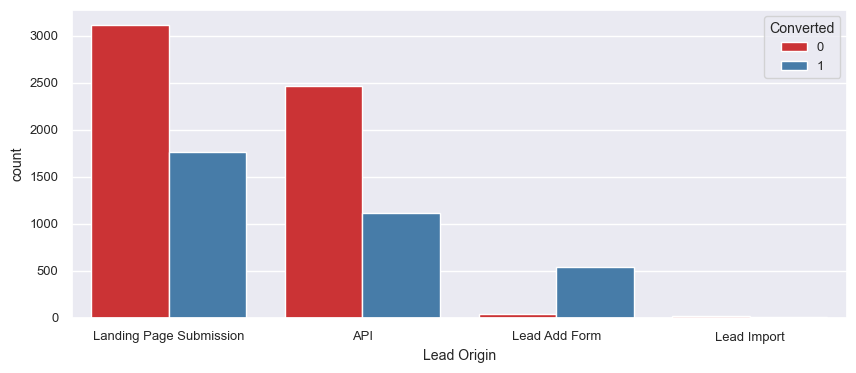

In [34]:
# Graphical representation of "Lead Origin" column 
plt.figure(figsize=(10,4))
sns.set(font_scale = 0.85)
sns.countplot(Lead_Score['Lead Origin'],hue = "Converted", data = Lead_Score,palette='Set1', 
             order = Lead_Score['Lead Origin'].value_counts().index)
plt.show()

***
<b><font color ='brown'> Note: </font> </b>
<font color= 'darkslategray'>
<ul>
<font color= 'darkslategray'><b>
<li>"API" and "Landing Page Submission" have maxiumn conversion rate but count of lead originated from them are considerable.</li>
<li>"Lead Add" Form has more than high conversion rate but count of lead are not very high.</li>
<li>"Lead Import" are very less in count. %</li>
</font></b>

<p>
<font color= 'darkslategray'><b>
    <u>Action Plan:</u>
<p>
1. "API" and "Landing page Submission" origin can be focused on to improve overall lead conversion rate. <br>
2. More, imphase can be put on generating leads from "Lead Add Form" to increase lead count.</b>
</font>
</ul>

***

***
### <b><font color ='brown'> 3) 'Lead Scoure' Column: </font> <font color= 'darkslategray'>The source of the lead. Includes Google, Organic Search, Olark Chat, etc. </font></b>
***

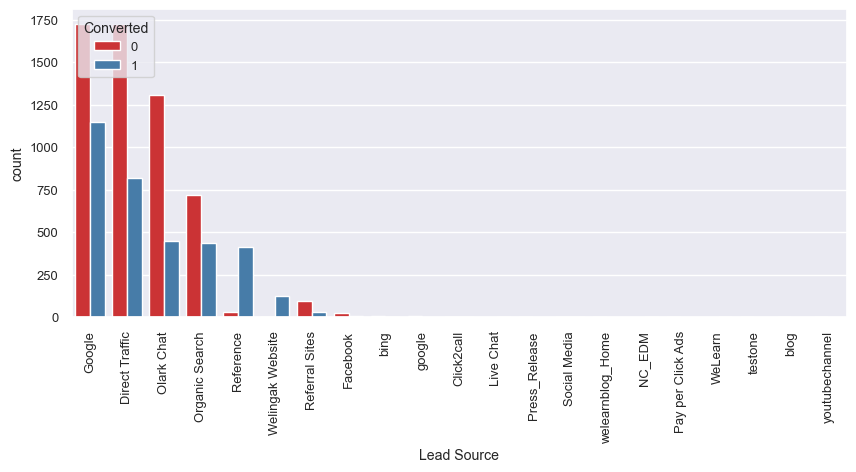

In [35]:
# Graphical representation of "Lead Source" column 
plt.figure(figsize=(10,4))
sns.set(font_scale = 0.85)
sns.countplot(Lead_Score['Lead Source'],hue = "Converted", data = Lead_Score,palette='Set1', 
             order = Lead_Score['Lead Source'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [36]:
# Two seperate values are listed for 'Google' and 'google', hence combining the both
Lead_Score['Lead Source'] = Lead_Score['Lead Source'].replace(['google'], 'Google')

# Assigning a common name for reset of the categories with significantly low values
Lead_Score['Lead Source'] = Lead_Score['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 
                                                             'Pay per Click Ads', 'Press_Release',
                                                             'Social Media', 'WeLearn', 'bing', 
                                                             'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 
                                                            'Other_Sources')

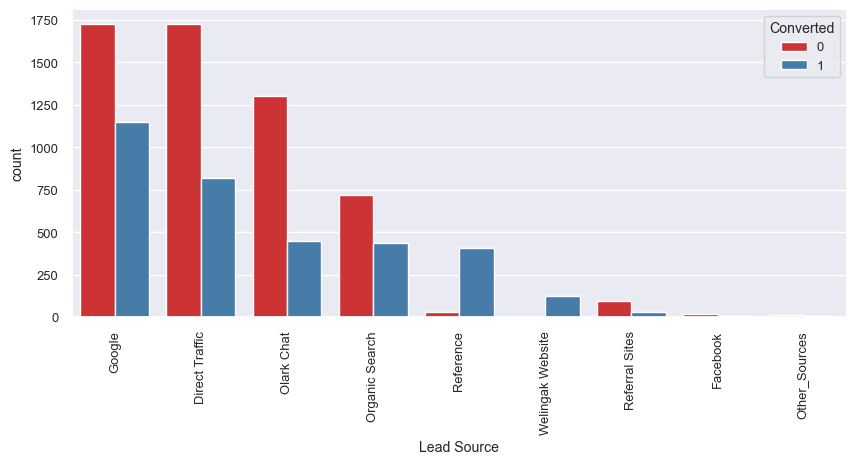

In [37]:
# Graphical representation of "Lead Origin" column post categorization
plt.figure(figsize=(10,4))
sns.set(font_scale = 0.85)
sns.countplot(Lead_Score['Lead Source'],hue = "Converted", data = Lead_Score,palette='Set1',
              order = Lead_Score['Lead Source'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

***
<b><font color ='brown'> Note: </font> </b>
<font color= 'darkslategray'>
<ul>
<font color= 'darkslategray'><b>
<li> Maximun Number of Leads Generated: 'Google' and 'Direct traffic'</li>
<li>Highest Conversation Rate: 'Reference' and 'welingak website' </li>
</font></b>

<p>
<font color= 'darkslategray'><b>
Action Plan:<p>
1. Improve lead conversion rate: By focusing on 'Olark Chat', 'Organic Search', 'Direct traffic, and 'Google' leads.<br>
2. Generate more leads: By focusing on 'Reference' and 'Welingak Website' since they have high conversation rate.</b>
</font>
</ul>

***
### <b><font color ='brown'> 4) 'Do not Email' Column: </font> <font color= 'darkslategray'>An indicator variable selected by the customer wherein they select whether they want to be emailed about the course or not. </font></b>
***

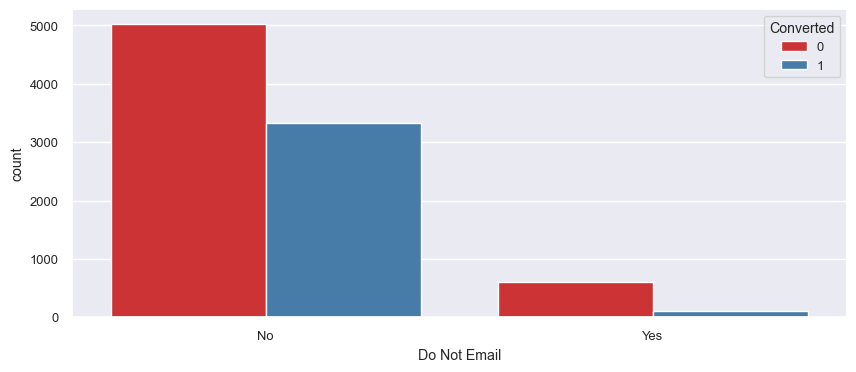

In [38]:
# Graphical representation of "Do not Email" column 
plt.figure(figsize=(10,4))
sns.set(font_scale = 0.85)
sns.countplot(Lead_Score['Do Not Email'],hue = "Converted", data = Lead_Score,palette='Set1')
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>No insight can be drawn since most of the values in column 'Do not Email' are "No", hence can not predict anything.set</font></b>
***

***
### <b><font color ='brown'> 5) 'Do Not Call' Column: </font> <font color= 'darkslategray'>An indicator variable selected by the customer wherein they select whether they want to be called about the course or not. </font></b>
***

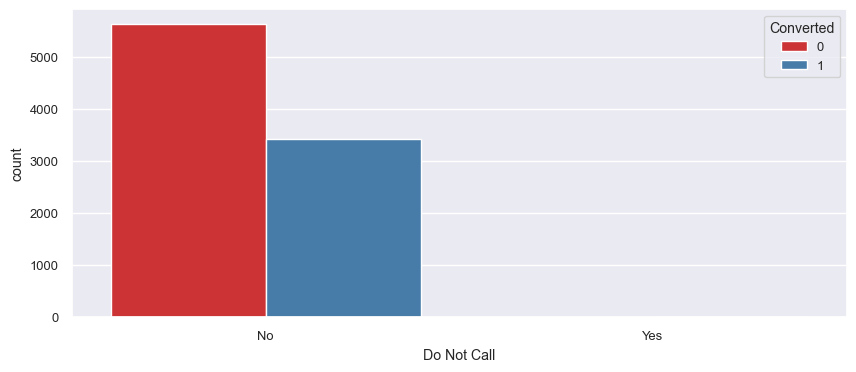

In [39]:
# Graphical representation of "Do Not Call" column 
plt.figure(figsize=(10,4))
sns.set(font_scale = 0.85)
sns.countplot(Lead_Score['Do Not Call'],hue = "Converted", data = Lead_Score,palette='Set1')
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>No insight can be drawn since most of the values in column 'Do Not Call' are "No", hence can not predict anything</font></b>
***

***
### <b><font color ='brown'> 6) 'TotalVisits' Column: </font> <font color= 'darkslategray'>The total number of visits made by the customer on the website. </font></b>
***

In [40]:
# Since the 'TotalVisits' has continues numerical variables hence deriving description
round(Lead_Score['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99]),2)

count    9074.00
mean        3.46
std         4.86
min         0.00
5%          0.00
25%         1.00
50%         3.00
75%         5.00
90%         7.00
95%        10.00
99%        17.00
max       251.00
Name: TotalVisits, dtype: float64

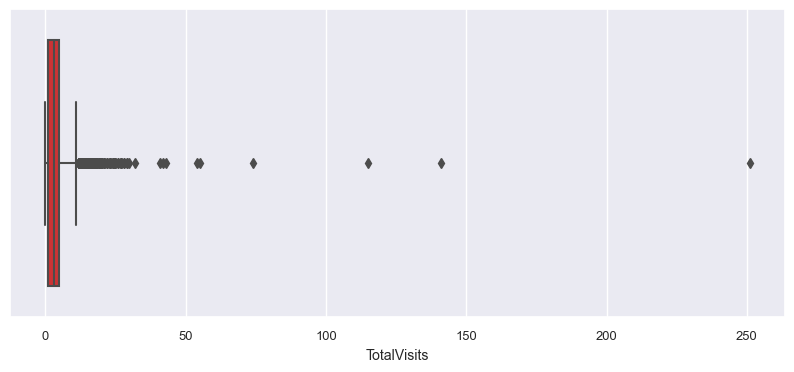

In [41]:
# Graphical representation of "TotalVisits" column in Box plot
plt.figure(figsize=(10,4))
sns.set(font_scale = 0.85)
sns.boxplot(Lead_Score['TotalVisits'],orient='vert',palette='Set1')
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'saddlebrown'>Capping the outliers to 95% since there are few outliers in the data.</font></b>
***

In [42]:
# Capping the outliers to 95% for 'TotalVisits'
percentiles = Lead_Score['TotalVisits'].quantile([0.05,0.95]).values
Lead_Score['TotalVisits'][Lead_Score['TotalVisits'] <= percentiles[0]] = percentiles[0]
Lead_Score['TotalVisits'][Lead_Score['TotalVisits'] >= percentiles[1]] = percentiles[1]

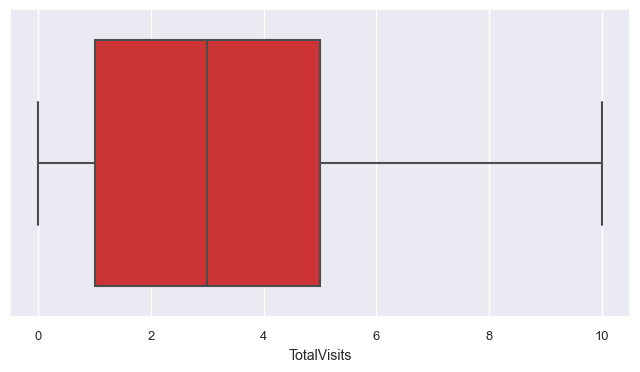

In [43]:
# Graphical representation of "TotalVisits" column in Box plot post capping
plt.figure(figsize=(8,4))
sns.set(font_scale = 0.85)
sns.boxplot(Lead_Score['TotalVisits'],orient='vert', palette='Set1')
plt.show()

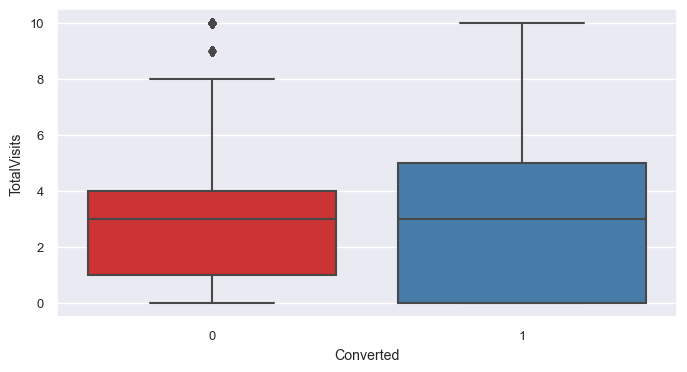

In [44]:
# Boxplot representation of "TotalVisits" vs 'Converted'
plt.figure(figsize=(8,4))
sns.set(font_scale = 0.85)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Lead_Score, palette='Set1')
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>Since, the Median for 'Converted' and 'Not Converted' leads is same, hence can nor predict anything from this.  </font></b>
***

***
### <b><font color ='brown'> 7) 'Total Time Spent on Website' Column: </font> <font color= 'darkslategray'>The total time spent by the customer on the website. </font></b>
***

In [45]:
# Since the 'Total Time Spent on Website' has continues numerical variables hence deriving description
round(Lead_Score['Total Time Spent on Website'].describe(),2)

count    9074.00
mean      482.89
std       545.26
min         0.00
25%        11.00
50%       246.00
75%       922.75
max      2272.00
Name: Total Time Spent on Website, dtype: float64

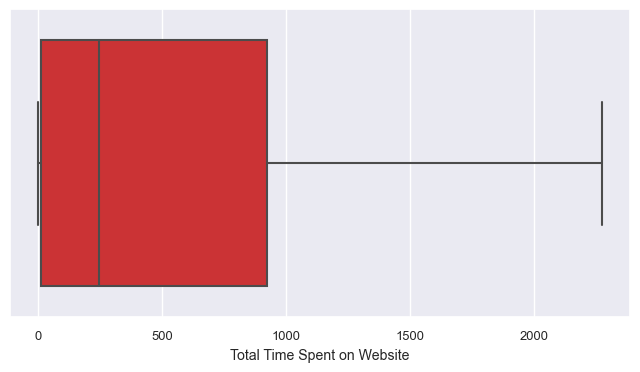

In [46]:
# Graphical representation of "Total Time Spent on Website" column in Box plot
plt.figure(figsize=(8,4))
sns.set(font_scale = 0.85)
sns.boxplot(Lead_Score['Total Time Spent on Website'],orient='vert',palette='Set1')
plt.show()

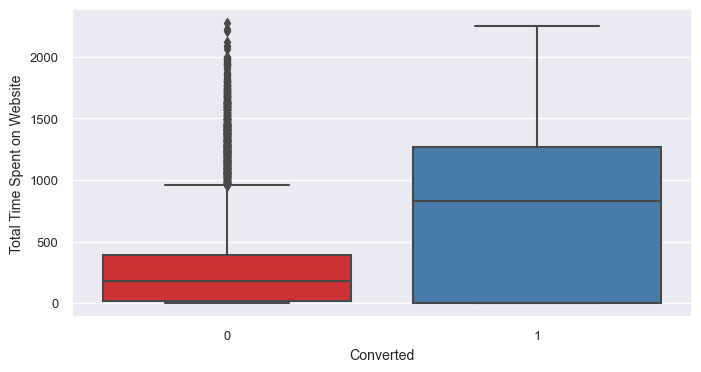

In [47]:
# Boxplot representation of "Total Time Spent on Website" vs 'Converted'
plt.figure(figsize=(8,4))
sns.set(font_scale = 0.85)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Lead_Score, palette='Set1')
plt.show()

***
<b><font color ='brown'> Note: </font> 
<font color= 'darkslategray'> From the above boxplot it is clearly visible that more the time spent on the website has a high impact on lead conversion. Hence, more imphase should be put on improving the website interface and making it user friendly and informative  </font></b>
***

***
### <b><font color ='brown'> 8) 'Page Views Per Visit' Column: </font> <font color= 'darkslategray'>Average number of pages on the website viewed during the visits. </font></b>
***

In [48]:
# Since the 'Page Views Per Visit' has continues numerical variables hence deriving description
round(Lead_Score['Page Views Per Visit'].describe(),2)

count    9074.00
mean        2.37
std         2.16
min         0.00
25%         1.00
50%         2.00
75%         3.20
max        55.00
Name: Page Views Per Visit, dtype: float64

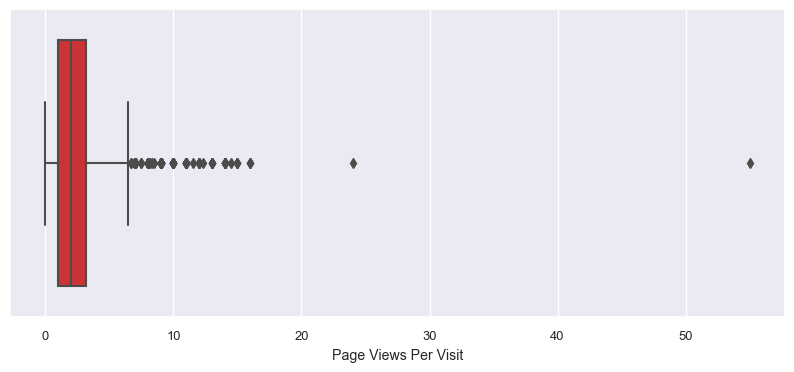

In [49]:
# Graphical representation of "Page Views Per Visit" column in Box plot
plt.figure(figsize=(10,4))
sns.set(font_scale = 0.85)
sns.boxplot(Lead_Score['Page Views Per Visit'],orient='vert',palette='Set1')
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>Capping the outliers to 95% since there are few outliers in the data.</font></b>
***

In [50]:
# Capping the outliers to 95% 
percentiles = Lead_Score['Page Views Per Visit'].quantile([0.05,0.95]).values
Lead_Score['Page Views Per Visit'][Lead_Score['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
Lead_Score['Page Views Per Visit'][Lead_Score['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

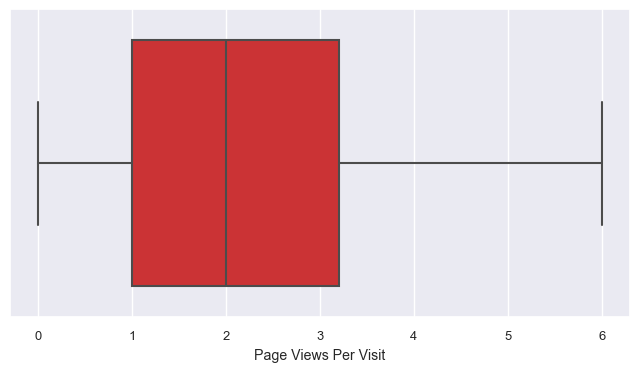

In [51]:
# Graphical representation of "Page Views Per Visit" column in Box plot  post capping
plt.figure(figsize=(8,4))
sns.set(font_scale = 0.85)
sns.boxplot(Lead_Score['Page Views Per Visit'],orient='vert',palette='Set1')
plt.show()

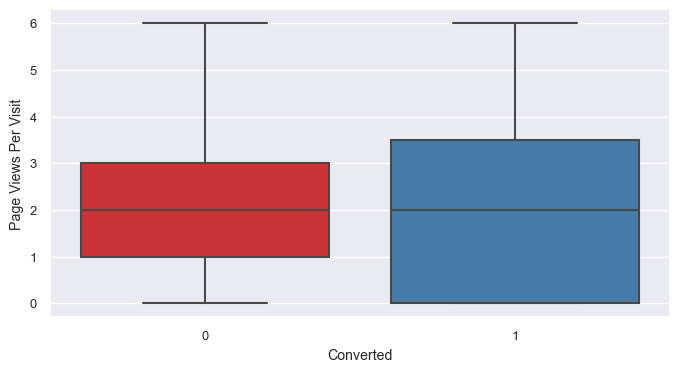

In [52]:
# Boxplot representation of "Page Views Per Visit" vs 'Converted'
plt.figure(figsize=(8,4))
sns.set(font_scale = 0.85)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = Lead_Score, palette='Set1')
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>Since, the Median for 'Converted' and 'Not Converted' leads is same, hence can nor predict anything from this.  </font></b>
***

***
### <b><font color ='brown'> 9) 'Last Activity' Column: </font> <font color= 'darkslategray'>Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc. </font></b>
***

In [53]:
# Since the 'Last Activity' has continues numerical variables hence deriving description
Lead_Score['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

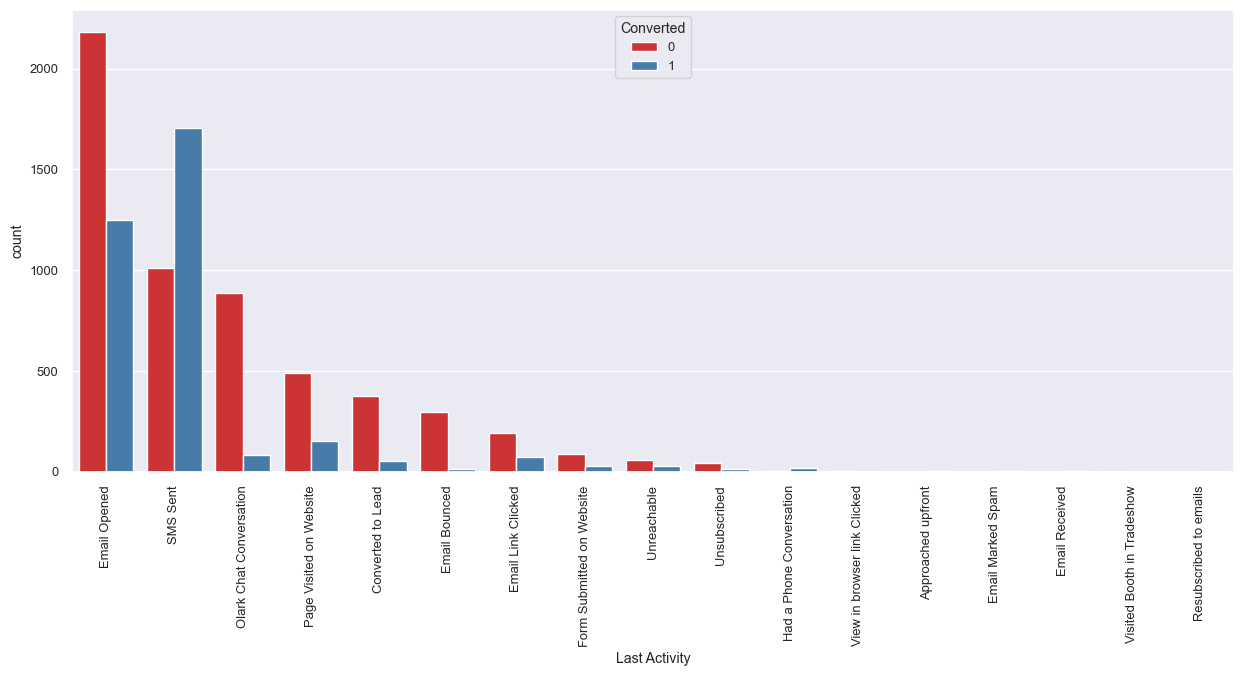

In [54]:
# Boxplot representation of "Last Activity" vs 'Converted'
plt.figure(figsize=(15,6))
sns.set(font_scale = 0.85)
sns.countplot(x = "Last Activity", hue = "Converted", data = Lead_Score,palette='Set1',
             order = Lead_Score['Last Activity'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [55]:
# Categorizing variables with significantly less values as single category 'Other_Activity'
Lead_Score['Last Activity'] = Lead_Score['Last Activity'].replace(['Had a Phone Conversation',
                                                                 'View in browser link Clicked', 
                                                                 'Visited Booth in Tradeshow', 
                                                                 'Approached upfront',
                                                                 'Resubscribed to emails',
                                                                 'Email Received', 
                                                                 'Email Marked Spam'], 
                                                                'Other_Activity')

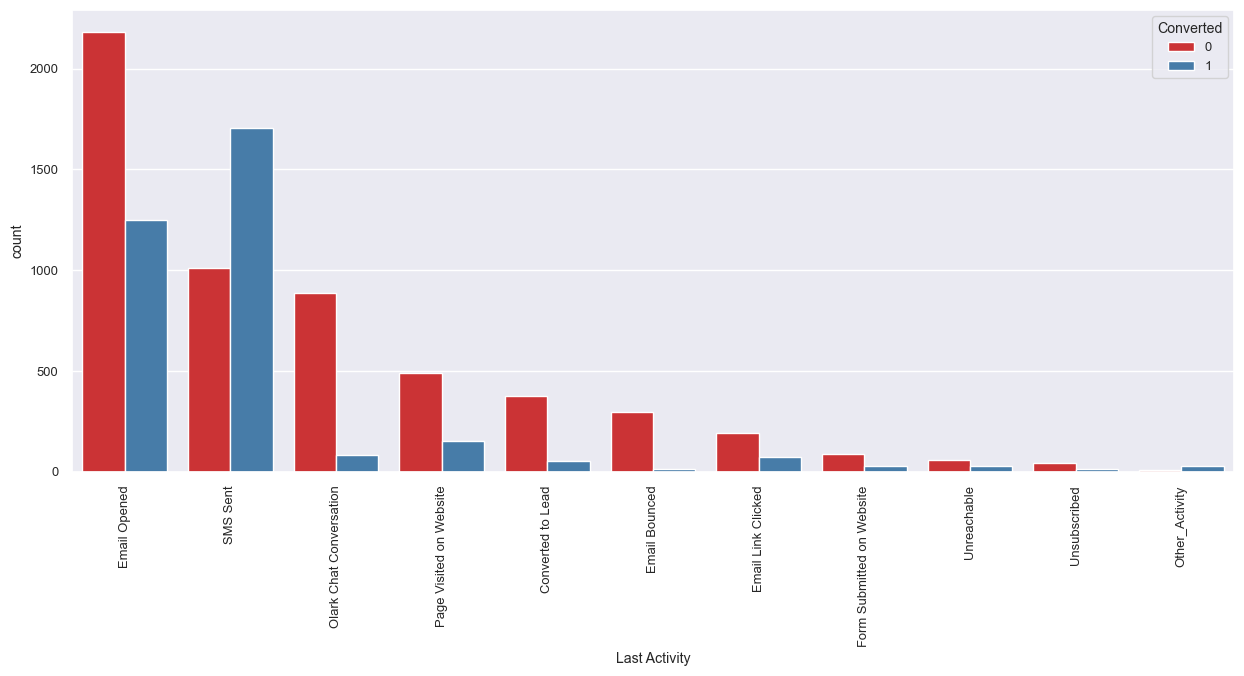

In [56]:
# Boxplot representation of "Last Activity" vs 'Converted'
plt.figure(figsize=(15,6))
sns.set(font_scale = 0.85)
sns.countplot(x = "Last Activity", hue = "Converted", data = Lead_Score,palette='Set1', 
              order = Lead_Score['Last Activity'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

***
<b><font color ='brown'> Note: </font> </b>
<ul>
<font color= 'darkslategray'><b>
<li> Maximun Number of Leads Generated: 'Email Opened" Activity.</li>
<li>Highest Conversation Rate: 'SMS Sent' Activity</li>
</b></font>
</ul>

***
### <font color ='brown'> 10) 'Country': </font> 
<b><font color= 'darkslategray'>The country of the customer. </font></b>
***



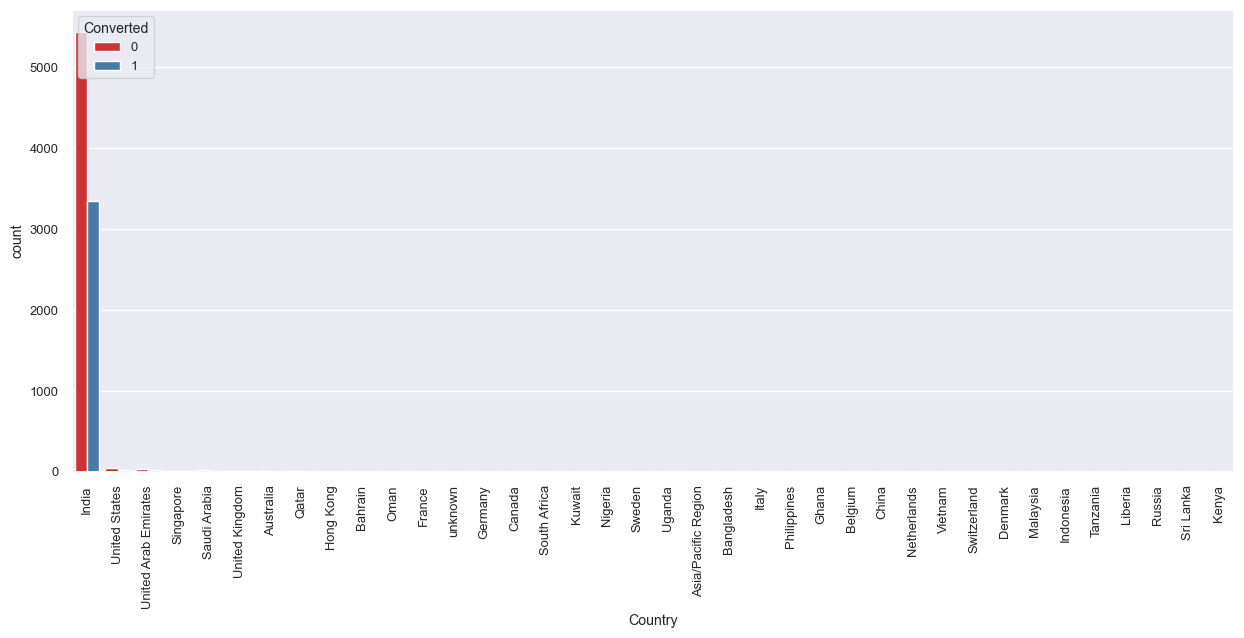

In [57]:
# Boxplot representation of "Country" vs 'Converted'
plt.figure(figsize=(15,6))
sns.set(font_scale = 0.85)
sns.countplot(x = "Country", hue = "Converted", data = Lead_Score,palette='Set1', 
              order = Lead_Score['Country'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>Highest Leads are generated from customer from "India". No significant predict can be made by the above data.</font></b>
***

***
### <b><font color ='brown'> 11) 'Specialization': </font></b> 
<b><font color= 'darkslategray'>The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form. </font></b>
***



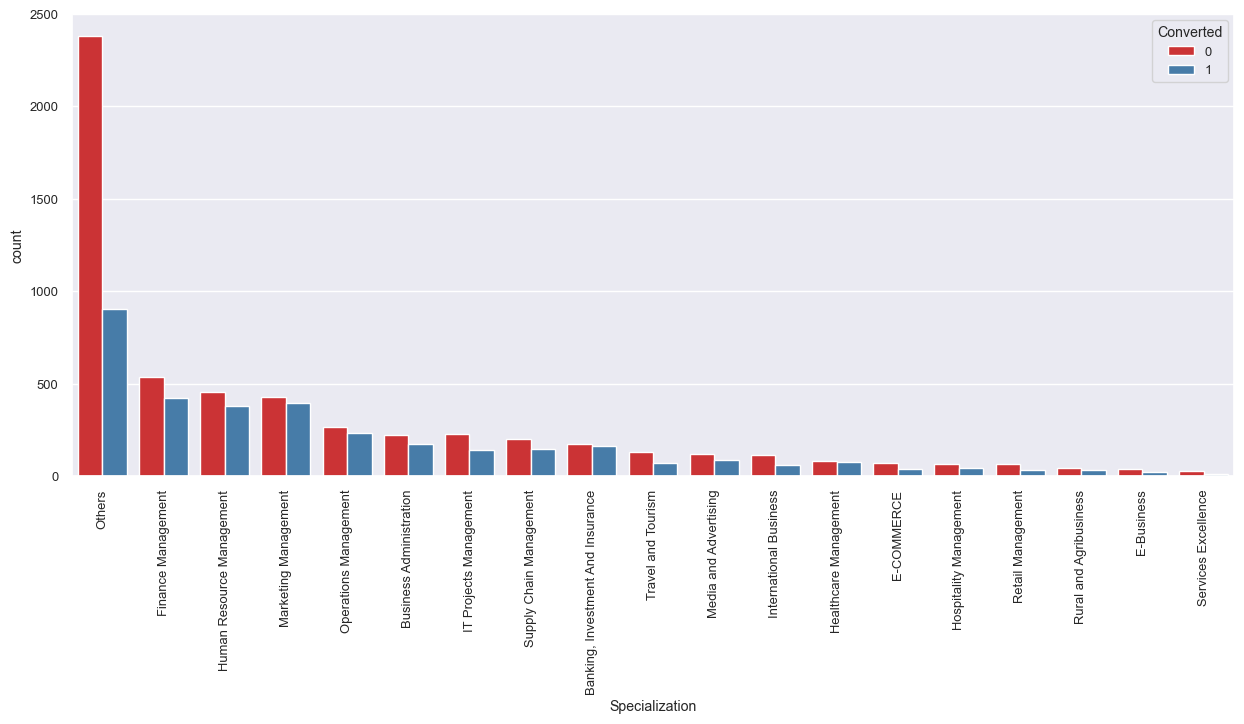

In [58]:
# Boxplot representation of "Specialization" vs 'Converted'
plt.figure(figsize=(15,6))
sns.set(font_scale = 0.85)
sns.countplot(x = "Specialization", hue = "Converted", data = Lead_Score,palette='Set1', 
              order = Lead_Score['Specialization'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>
<br>1. "Management' Specilizations have the higher conversion rate as be above plot. Hence, more focus should be put on those. <br> 2. Specilization in above graph with high conversion rates should also be considered.</font></b>
***

***
### <b><font color ='brown'> 12) 'What is your current occupation': </font></b> 
<b><font color= 'darkslategray'>Indicates whether the customer is a student, umemployed or employed.</font></b>
***



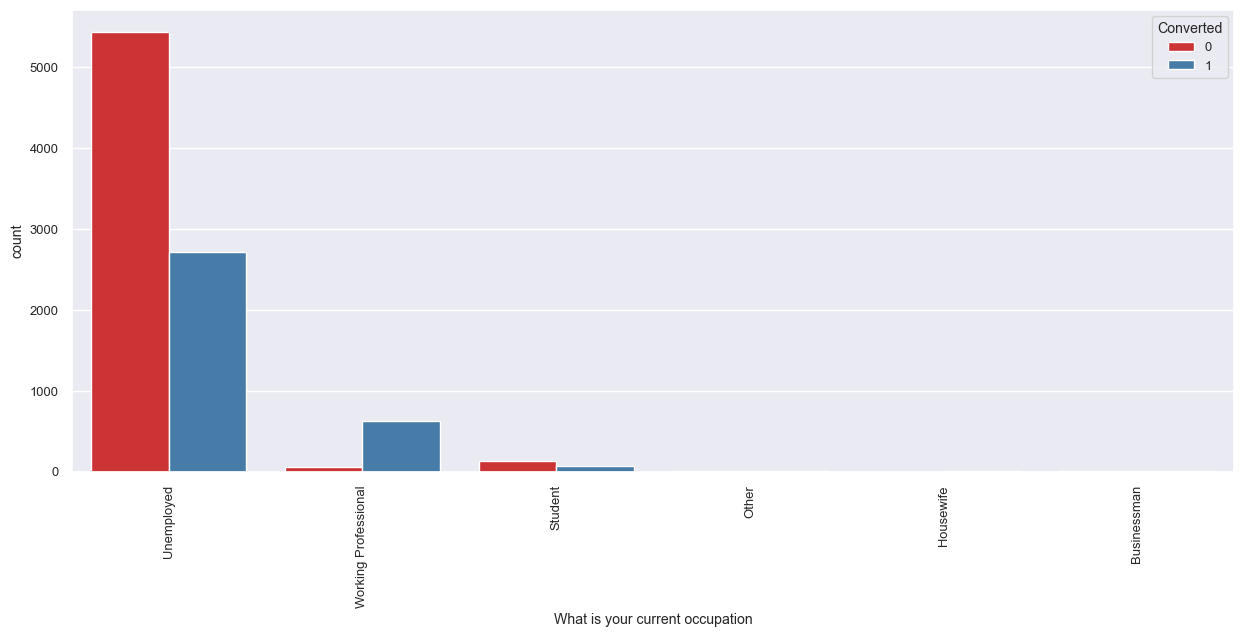

In [59]:
# Boxplot representation of "What is your current occupation" vs 'Converted'
plt.figure(figsize=(15,6))
sns.set(font_scale = 0.85)
sns.countplot(x = "What is your current occupation", hue = "Converted", data = Lead_Score,palette='Set1', 
              order = Lead_Score['What is your current occupation'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

***
<b><font color ='brown'> Note: </font><p>
<font color ='darkslategray'>
<b>1. Highest Conversation Rate: 'Unemployed' and ' Working Professional' Activity.</b><br>
<b>2. Unemployed and working Professional lead are more likely to convernt.</b> <br>
<b>3. Hence, more imphase should be made of these. "Students also have a good conversion rate but less number of leads.</b>
</font>

***
### <b><font color ='brown'> 13) 'Search': </font></b> 
<b><font color= 'darkslategray'>Indicating whether the customer had seen the ad by searching.</font></b>
***



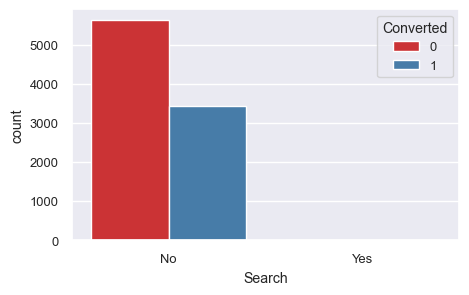

In [60]:
# Boxplot representation of "Search" vs 'Converted'
plt.figure(figsize=(5,3))
sns.set(font_scale = 0.85)
sns.countplot(x = "Search", hue = "Converted", data = Lead_Score,palette='Set1', 
              order = Lead_Score['Search'].value_counts().index)
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>No insight can be drawn since most of the values in column 'Search' are "No", hence can not predict anything.</font></b>
***

***
### <b><font color ='brown'> 14) 'Magazine': </font></b> 
<b><font color= 'darkslategray'>Indicating whether the customer had seen the ad in a Magazine.</font></b>
***



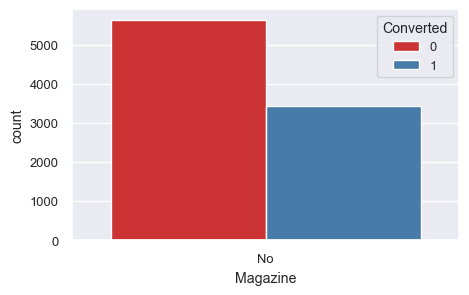

In [61]:
# Boxplot representation of "Magazine" vs 'Converted'
plt.figure(figsize=(5,3))
sns.set(font_scale = 0.85)
sns.countplot(x = "Magazine", hue = "Converted", data = Lead_Score,palette='Set1', 
              order = Lead_Score['Magazine'].value_counts().index)
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>No insight can be drawn since most of the values in column 'Magazine' are "No", hence can not predict anything.</font></b>
***

***
### <b><font color ='brown'> 15) 'Newspaper Article': </font></b> 
<b><font color= 'darkslategray'>Indicating whether the customer had seen the ad through Newspaper Article.</font></b>
***



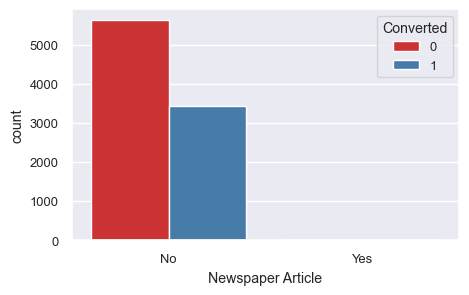

In [62]:
# Boxplot representation of "Newspaper Article" vs 'Converted'
plt.figure(figsize=(5,3))
sns.set(font_scale = 0.85)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = Lead_Score,palette='Set1', 
              order = Lead_Score['Newspaper Article'].value_counts().index)
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>No insight can be drawn since most of the values in column 'Newspaper Article' are "No", hence can not predict anything.</font></b>
***

***
### <b><font color ='brown'> 16) 'X Education Forums': </font></b> 
<b><font color= 'darkslategray'>Indicating whether the customer had seen the ad through X Education Forums.</font></b>
***



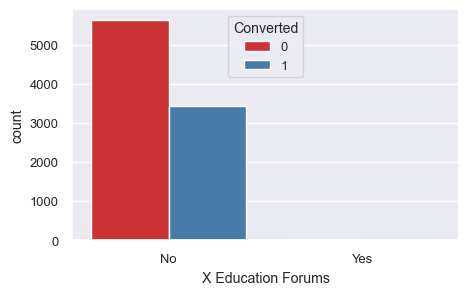

In [63]:
# Boxplot representation of "X Education Forums" vs 'Converted'
plt.figure(figsize=(5,3))
sns.set(font_scale = 0.85)
sns.countplot(x = "X Education Forums", hue = "Converted", data = Lead_Score,palette='Set1', 
              order = Lead_Score['X Education Forums'].value_counts().index)
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>No insight can be drawn since most of the values in column 'X Education Forums' are "No", hence can not predict anything.</font></b>
***

***
### <b><font color ='brown'> 17) 'Newspaper': </font></b> 
<b><font color= 'darkslategray'>Indicating whether the customer had seen the ad through Newspaper.</font></b>
***



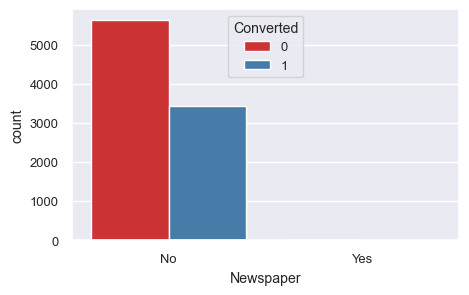

In [64]:
# Boxplot representation of "Newspaper" vs 'Converted'
plt.figure(figsize=(5,3))
sns.set(font_scale = 0.85)
sns.countplot(x = "Newspaper", hue = "Converted", data = Lead_Score,palette='Set1', 
              order = Lead_Score['Newspaper'].value_counts().index)
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>No insight can be drawn since most of the values in column 'Newspaper' are "No", hence can not predict anything.</font></b>
***

***
### <b><font color ='brown'> 18) 'Digital Advertisement': </font></b> 
<b><font color= 'darkslategray'>Indicating whether the customer had seen the ad through Digital Advertisement.</font></b>
***



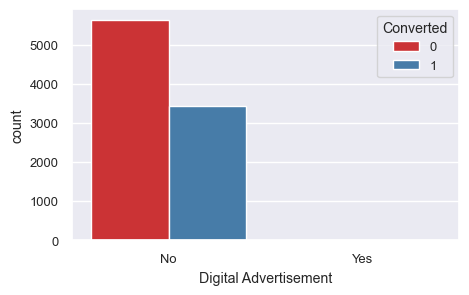

In [65]:
# Boxplot representation of "Digital Advertisement" vs 'Converted'
plt.figure(figsize=(5,3))
sns.set(font_scale = 0.85)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = Lead_Score,palette='Set1', 
              order = Lead_Score['Digital Advertisement'].value_counts().index)
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>No insight can be drawn since most of the values in column 'Digital Advertisement' are "No", hence can not predict anything.</font></b>
***

***
### <b><font color ='brown'> 19) 'Through Recommendations': </font></b> 
<b><font color= 'darkslategray'>Indicating whether the customer had seen the ad through Through Recommendations.</font></b>
***



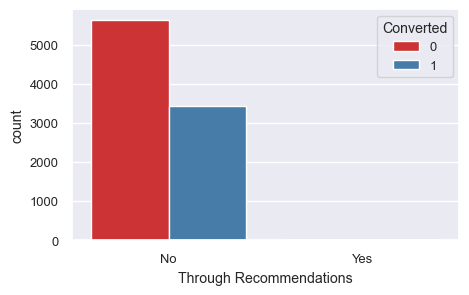

In [66]:
# Boxplot representation of "Through Recommendations" vs 'Converted'
plt.figure(figsize=(5,3))
sns.set(font_scale = 0.85)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = Lead_Score,palette='Set1', 
              order = Lead_Score['Through Recommendations'].value_counts().index)
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>No insight can be drawn since most of the values in column 'Through Recommendations' are "No", hence can not predict anything.</font></b>
***

***
### <b><font color ='brown'> 20) 'Receive More Updates About Our Courses': </font></b> 
<b><font color= 'darkslategray'>Indicates whether the customer chose to receive more updates about the courses.</font></b>
***



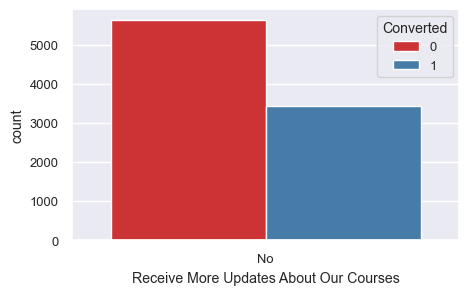

In [67]:
# Boxplot representation of "Receive More Updates About Our Courses" vs 'Converted'
plt.figure(figsize=(5,3))
sns.set(font_scale = 0.85)
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = Lead_Score,palette='Set1', 
              order = Lead_Score['Receive More Updates About Our Courses'].value_counts().index)
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>No insight can be drawn since most of the values in column 'Receive More Updates About Our Courses' are "No", hence can not predict anything.</font></b>
***

***
### <b><font color ='brown'> >> 21) 'Tags': </font></b> 
<b><font color= 'darkslategray'>Tags assigned to customers indicating the current status of the lead.</font></b>
***



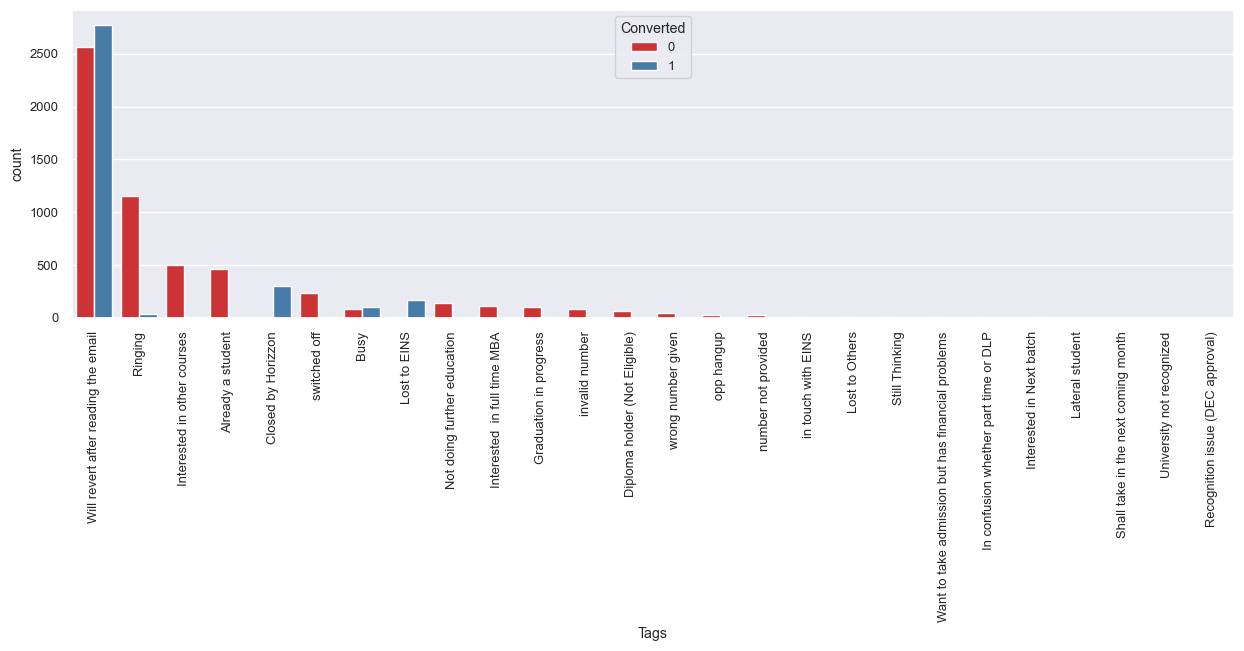

In [68]:
# Boxplot representation of "Tags" vs 'Converted'
plt.figure(figsize=(15,4))
sns.set(font_scale = 0.85)
sns.countplot(x = "Tags", hue = "Converted", data = Lead_Score,palette='Set1', 
              order = Lead_Score['Tags'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>Tags are assigned to the customer by the sales team indicating their current status. Hence, does not have any significant use and can be drop.</font></b>
***

***
### <b><font color ='brown'> 22) 'Update me on Supply Chain Content': </font></b> 
<b><font color= 'darkslategray'>Indicates whether the customer wants updates on the Supply Chain Content.</font></b>
***



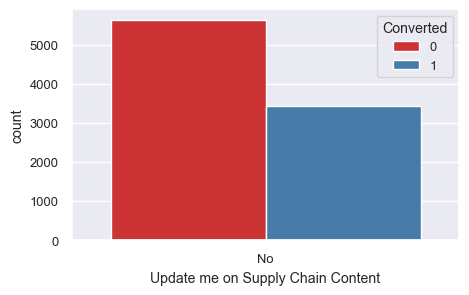

In [69]:
# Boxplot representation of "Update me on Supply Chain Content" column vs 'Converted'
plt.figure(figsize=(5,3))
sns.set(font_scale = 0.85)
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = Lead_Score,palette='Set1')
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>No insight can be drawn since most of the values in column 'Update me on Supply Chain Content' are "No", hence can not predict anything.</font></b>
***

***
### <b><font color ='brown'> 23) 'Get updates on DM Content': </font></b> 
<b><font color= 'darkslategray'>Indicates whether the customer wants updates on the DM Content.</font></b>
***



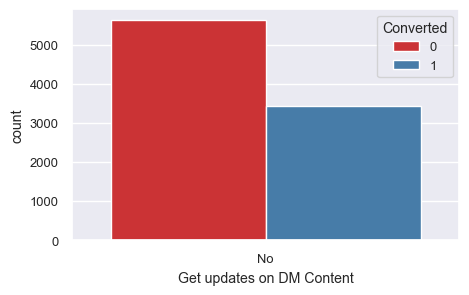

In [70]:
# Boxplot representation of "Get updates on DM Content" column vs 'Converted'
plt.figure(figsize=(5,3))
sns.set(font_scale = 0.85)
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = Lead_Score,palette='Set1')
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>No insight can be drawn since most of the values in column 'Get updates on DM Content' are "No", hence can not predict anything.</font></b>
***

***
### <b><font color ='brown'> 24) 'City': </font></b> 
<b><font color= 'darkslategray'>The city of the customer.</font></b>
***



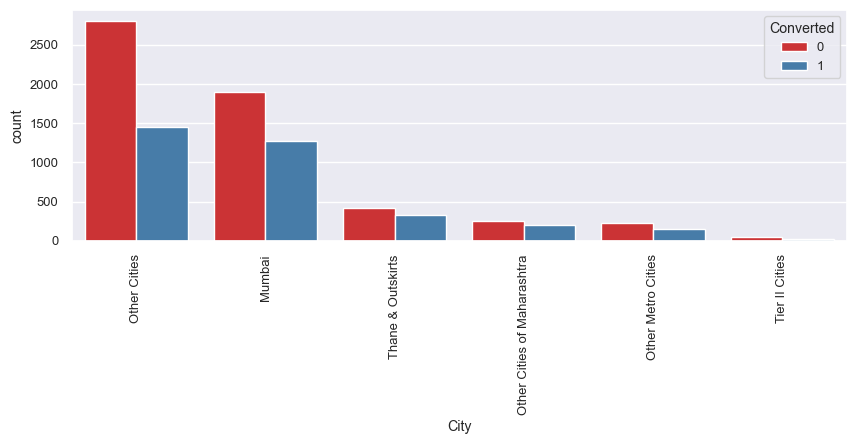

In [71]:
# Boxplot representation of "City" column vs 'Converted'
plt.figure(figsize=(10,3))
sns.set(font_scale = 0.85)
sns.countplot(x = "City", hue = "Converted", data = Lead_Score,palette='Set1',
             order = Lead_Score['City'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'> 'Mumbai' has most leads with around 50% conversion rate.</font></b>
***

***
### <b><font color ='brown'> 25) 'I agree to pay the amount through cheque': </font></b> 
<b><font color= 'darkslategray'>Indicates whether the customer has agreed to pay the amount through cheque or not.</font></b>
***



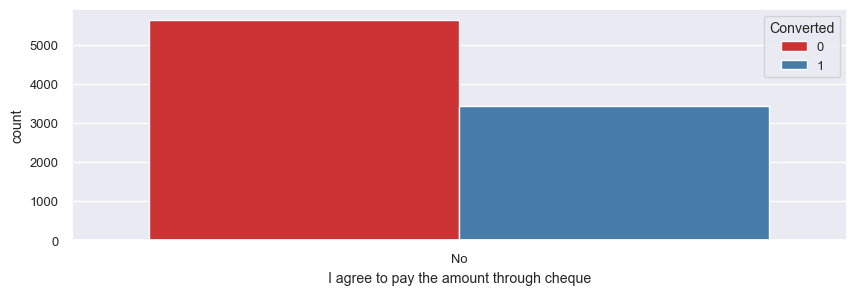

In [72]:
# Boxplot representation of "I agree to pay the amount through cheque" column vs 'Converted'
plt.figure(figsize=(10,3))
sns.set(font_scale = 0.85)
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = Lead_Score,palette='Set1',
             order = Lead_Score['I agree to pay the amount through cheque'].value_counts().index)

plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>No insight can be drawn since most of the values in column 'I agree to pay the amount through cheque' are "No", hence can not predict anything.</font></b>
***

***
### <b><font color ='brown'> 26) 'A free copy of Mastering The Interview': </font></b> 
<b><font color= 'darkslategray'>Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.</font></b>
***



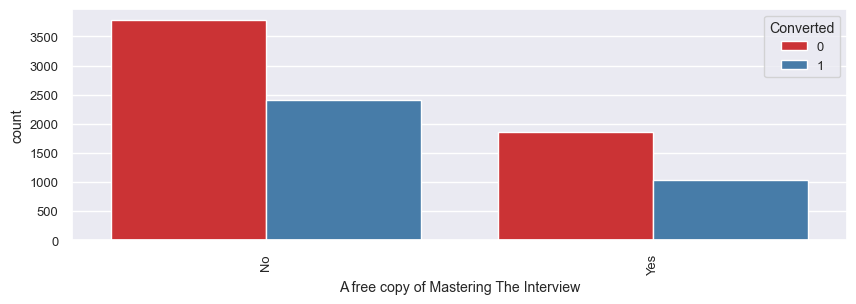

In [73]:
# Boxplot representation of "A free copy of Mastering The Interview" column vs 'Converted'
plt.figure(figsize=(10,3))
sns.set(font_scale = 0.85)
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = Lead_Score,palette='Set1',
             order = Lead_Score['A free copy of Mastering The Interview'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

***
<b><font color ='brown'> Note: </font> <font color= 'darkslategray'>No insight can be drawn since most of the values in column 'A free copy of Mastering The Interview' are "No", hence can not predict anything.</font></b>
***

***
### <b><font color ='brown'> 27) 'Last Notable Activity': </font></b> 
<b><font color= 'darkslategray'>The last notable acitivity performed by the student..</font></b>
***



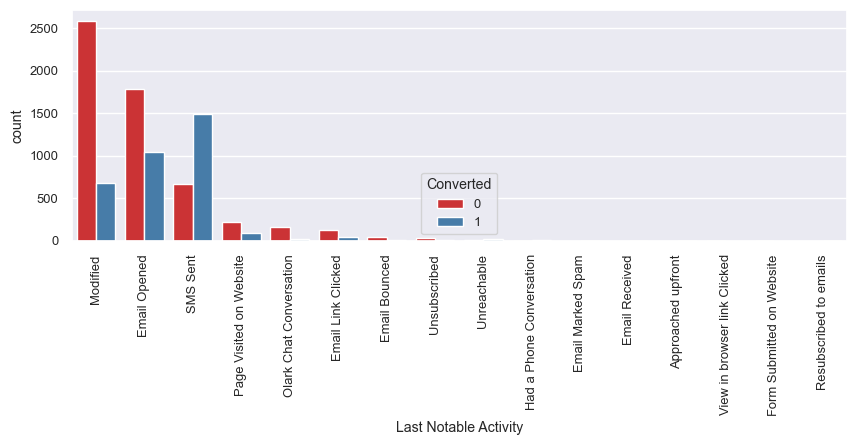

In [74]:
# Boxplot representation of "Last Notable Activity" column vs 'Converted'
plt.figure(figsize=(10,3))
sns.set(font_scale = 0.85)
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Lead_Score,palette='Set1',
             order = Lead_Score['Last Notable Activity'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

***
<b><font color ='brown'> Note:<font>
    <font color = "darkslategray">'SMS Sent' and 'Email Opened' has high rate of conversion. </font> 
***

***
## <font color = 'brown'>ANALYSIS OUTCOME:</font>
<b><font color ='darkslategray'> The univariate analysis indicates that many columns does not have any significant information which can be added to the model, hence we can drop them for further analysis. </font> 
***

In [75]:
Lead_Score = Lead_Score.drop(['Magazine','Newspaper Article','X Education Forums',
                            'Lead Number','Tags','Country','Search',
                            'Newspaper','Digital Advertisement',
                            'Through Recommendations',
                            'Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content',
                            'Get updates on DM Content',
                            'I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [76]:
# Lead_Score information post dropping the above columns
Lead_Score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

***
## <font color = 'brown'>DATA PREPARATION</font>
***

***
### <font color = 'brown'>1) Converting Binary Variables: (Yes/No) to (1/0)</font>
***

In [77]:
bin_vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

Lead_Score[bin_vars] = Lead_Score[bin_vars].apply(binary_map)

***
### <font color = 'brown'>2) Creating Dummy variables for the categorical variables:</font>

<font color = 'darkslategray'><b> ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity] </b></font>
***

In [78]:
# Dummy variable for the categorical variables (dropping the first one).
dummy_lead = pd.get_dummies(Lead_Score[['Lead Origin', 'Lead Source', 
                                       'Last Activity', 'Specialization',
                                       'What is your current occupation',
                                       'City','Last Notable Activity']], drop_first=True)

In [79]:
# Dummy DataFrame
dummy_lead.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# Shape and shize of 'dummy_lead' dataframe
print("Shape of dummy_lead:",dummy_lead.shape)
print("Size of dummy_lead:",dummy_lead.size)

Shape of dummy_lead: (9074, 64)
Size of dummy_lead: 580736


In [81]:
# Concatenate 'dummy_data' and 'Lead_Score dataframe'
Lead_Score = pd.concat([Lead_Score, dummy_lead], axis=1)

In [82]:
Lead_Score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,25f52229-3a84-47f2-bc3d-276e9131481c,Landing Page Submission,Direct Traffic,0,0,0,4.0,709,2.0,Form Submitted on Website,...,0,0,1,0,0,0,0,0,0,0
2,268a0974-b8a5-46ea-9ec4-99d7e2935459,API,Organic Search,0,0,1,6.0,1401,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,007c3194-d60e-4a31-a00e-98f93c94bda3,Lead Add Form,Reference,0,0,1,0.0,0,0.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
4,7b554bb4-612c-4b06-92cf-cbbc8e9f6b6f,Landing Page Submission,Organic Search,0,0,1,3.0,16,1.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
5,0dd4af95-9eea-4ad2-8dde-804752e9130c,Landing Page Submission,Google,0,0,1,4.0,1568,4.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# 'Lead_Score' information post Concatenating 'dummy_lead'
Lead_Score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 78 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Lead Origin                                           9074 non-null   object 
 2   Lead Source                                           9074 non-null   object 
 3   Do Not Email                                          9074 non-null   int64  
 4   Do Not Call                                           9074 non-null   int64  
 5   Converted                                             9074 non-null   int64  
 6   TotalVisits                                           9074 non-null   float64
 7   Total Time Spent on Website                           9074 non-null   int64  
 8   Page Views Per Visit                                  9074

***
### <font color = 'brown'>3) Drop Columns: </font>
<font color = 'darkslategray'><b>Dropping the columns for which dummies were created</b></font>
***

In [84]:
Lead_Score = Lead_Score.drop(['Lead Origin', 'Lead Source',
                            'Last Activity', 'Specialization',
                            'What is your current occupation',
                            'City','Last Notable Activity'], axis = 1)

In [85]:
Lead_Score.head(3)

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,25f52229-3a84-47f2-bc3d-276e9131481c,0,0,0,4.0,709,2.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,268a0974-b8a5-46ea-9ec4-99d7e2935459,0,0,1,6.0,1401,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,007c3194-d60e-4a31-a00e-98f93c94bda3,0,0,1,0.0,0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# Shape and shize of 'Lead_Score' dataframe post dropping columns
print("Shape of Lead_Score:",Lead_Score.shape)
print("Size of Lead_Score:",Lead_Score.size)

Shape of Lead_Score: (9074, 71)
Size of Lead_Score: 644254


***
### <font color = 'brown'>4) Splitting Data: </font>
<font color = 'darkslategray'><b>Splitting the data into train and test set</b></font>
***

In [87]:
# Imporitg 'train_test_split'
from sklearn.model_selection import train_test_split

In [88]:
# Using 'X' as feature variable
X = Lead_Score.drop(['Prospect ID','Converted'], axis=1)

In [89]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,4.0,709,2.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,6.0,1401,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.0,16,1.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,4.0,1568,4.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# Using 'y' as target variable
y = Lead_Score['Converted']

In [91]:
y.head()

0    0
2    1
3    1
4    1
5    1
Name: Converted, dtype: int64

In [92]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, 
                                                    test_size=0.3, random_state=100)

***
### <font color = 'brown'>5) Feature Scaling </font>
<font color = 'darkslategray'><b>Scaling the feature variables</b></font>
***

In [93]:
# Importing 'StandardScaler'
from sklearn.preprocessing import StandardScaler

In [94]:
# Feature scalling
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [95]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2973,1,0,2.445009,1.748393,0.129779,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
996,0,0,1.005041,-0.363496,0.411761,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9226,0,0,1.725025,-0.815912,0.975725,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4713,0,0,-0.434927,1.709929,-0.152203,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8005,0,0,-0.434927,-0.759131,-0.716167,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [96]:
# Verifying the Lead Conversion rate
Converted_Lead = (sum(Lead_Score['Converted'])/len(Lead_Score['Converted'].index))*100
print("Lead Conversion Rate:",round(Converted_Lead,2))

Lead Conversion Rate: 37.86


***
<b><font color ='brown'> Note: </font> 
    <font color ='darkslategray'>The lead conversion rate is approximately equal to 38%. </font> 
***

***
### <font color = 'brown'>5) Feature Selection Using RFE </font>
<font color = 'darkslategray'>Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.</b></font>
***



In [97]:
# Importing "Logisticregression" and "RFE"
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [98]:
#Logistic regression method to predict a binary outcome, such as yes or no, based on prior observations of a data set.
Log_Reg = LogisticRegression()

# Running RFE with 20 variables as output
rfe = RFE(Log_Reg, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [99]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True, False,  True, False, False,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False,  True, False, False])

In [100]:
# Verifying which columns are selected by RFE and which are not
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 14),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Other_Sources', False, 16),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 21),
 ('Last Activity_Email Link Clicked', False, 24),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 43),
 ('Last Activity_Olark Chat Conversation', False, 3),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 47),
 ('Last Activity_SMS Sent', Tr

In [101]:
# Confirming columns selected by RFE
Rfe_Cols = X_train.columns[rfe.support_]
Rfe_Cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

***
## <font color = 'brown'>MODEL BUILDING</font>
***

***
### <font color = 'brown'>Assessing the Fit of Regression Models </font>
<font color = 'darkslategray'><b>Assessing the model with StatsModels and Pvalue test</b></font>
***

In [102]:
# Importing 'statsmodels'
import statsmodels.api as sm

# Importing VIF Variance Inflation Factor (VIF)
# VIF measures the strength of the correlation between the independent variables in regression analysis.
from statsmodels.stats.outliers_influence import variance_inflation_factor

***
### <font color = 'brown'><u>MODEL - 1<u></font>
***

In [103]:
X_train_sm = sm.add_constant(X_train[Rfe_Cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.4
Date:                Wed, 28 Jun 2023   Deviance:                       5184.8
Time:                        05:03:59   Pearson chi2:                 6.31e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4008
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0898      1.326      0.822      0.411      -1.509       3.689
Do Not Email                                            -1.4253      0.186     -7.647      0.000      -1.791      -1.060
Total Time Spent on Website                              1.0741      0.040     26.654      0.000       0.995       1.153
Lead Origin_Landing Page Submission                     -1.0807      0.130     -8.345      0.000      -1.335      -0.827
Lead Origin_Lead Add Form                                1.6412      0.884      1.857      0.063      -0.091       3.373
Lead Source_Olark Chat                                   0.9922      0.121      8.191      0.000       0.755       1.230
Lead Source_Reference                                    1.7523      0.911      1.924      0.054      -0.033       3.538
Lead Source_Welingak Website                             4.8150      1.342      3.588      0.000       2.185       7.445
Last Activity_Email Opened                               1.0517      0.155      6.769      0.000       0.747       1.356
Last Activity_Other_Activity                             3.1144      0.561      5.551      0.000       2.015       4.214
Last Activity_SMS Sent                                   1.5063      0.112     13.414      0.000       1.286       1.726
Specialization_Others                                   -1.1796      0.126     -9.331      0.000      -1.427      -0.932
What is your current occupation_Housewife               21.3001   1.43e+04      0.001      0.999   -2.81e+04    2.81e+04
What is your current occupation_Other                   -1.4139      1.551     -0.912      0.362      -4.454       1.626
What is your current occupation_Student                 -1.0462      1.346     -0.777      0.437      -3.685       1.593
What is your current occupation_Unemployed              -1.3664      1.325     -1.031      0.303      -3.964       1.231
What is your current occupation_Working Professional     1.3984      1.340      1.044      0.297      -1.227       4.024
Last Notable Activity_Email Opened                      -0.9339      0.178     -5.243      0.000      -1.283      -0.585
Last Notable Activity_Modified                          -1.1608      0.111    -10.469      0.000      -1.378      -0.943
Last Notable Activity_Olark Chat Conversation           -1.4230      0.349     -4.082      0.000      -2.106      -0.740
Last Notable Activity_Unreachable                        1.5468      0.592      2.612      0.009       0.386       2.707
========================================================================================================================
"""

In [104]:
# Dropping the column 'What is your current occupation_Housewife'
Rfe_Cols1 = Rfe_Cols.drop('What is your current occupation_Housewife')

***
<b><font color ='brown'> Note:</font>
    <font color ='darkslategray'>Pvalue of 'What is your current occupation_Housewife' is very high, hence dropin this column. </font> 
***

***
### <font color = 'brown'><u>MODEL - 2<u></font>
***

In [105]:
X_train_sm = sm.add_constant(X_train[Rfe_Cols1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.6
Date:                Wed, 28 Jun 2023   Deviance:                       5187.1
Time:                        05:03:59   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4006
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.4561      1.126      2.182      0.029       0.250       4.662
Do Not Email                                            -1.4261      0.186     -7.652      0.000      -1.791      -1.061
Total Time Spent on Website                              1.0747      0.040     26.666      0.000       0.996       1.154
Lead Origin_Landing Page Submission                     -1.0724      0.129     -8.293      0.000      -1.326      -0.819
Lead Origin_Lead Add Form                                1.6465      0.884      1.863      0.062      -0.085       3.378
Lead Source_Olark Chat                                   0.9920      0.121      8.187      0.000       0.755       1.230
Lead Source_Reference                                    1.7507      0.911      1.922      0.055      -0.034       3.536
Lead Source_Welingak Website                             4.8108      1.342      3.585      0.000       2.181       7.441
Last Activity_Email Opened                               1.0534      0.155      6.787      0.000       0.749       1.358
Last Activity_Other_Activity                             3.1140      0.561      5.551      0.000       2.014       4.214
Last Activity_SMS Sent                                   1.5057      0.112     13.411      0.000       1.286       1.726
Specialization_Others                                   -1.1725      0.126     -9.286      0.000      -1.420      -0.925
What is your current occupation_Other                   -2.7868      1.379     -2.021      0.043      -5.490      -0.084
What is your current occupation_Student                 -2.4200      1.143     -2.116      0.034      -4.661      -0.179
What is your current occupation_Unemployed              -2.7397      1.119     -2.448      0.014      -4.933      -0.546
What is your current occupation_Working Professional     0.0254      1.136      0.022      0.982      -2.201       2.252
Last Notable Activity_Email Opened                      -0.9363      0.178     -5.260      0.000      -1.285      -0.587
Last Notable Activity_Modified                          -1.1605      0.111    -10.468      0.000      -1.378      -0.943
Last Notable Activity_Olark Chat Conversation           -1.4222      0.348     -4.081      0.000      -2.105      -0.739
Last Notable Activity_Unreachable                        1.5399      0.593      2.595      0.009       0.377       2.703
========================================================================================================================
"""

In [106]:
# Dropping the column 'What is your current occupation_Working Professional'
Rfe_Cols1 = Rfe_Cols1.drop('What is your current occupation_Working Professional')

***
<b><font color ='brown'> Note:</font>
    <font color ='darkslategray'>Pvalue of 'What is your current occupation_Working Professional' is very high, hence dropin this column. </font> 
***

***
### <font color = 'brown'><u>MODEL - 3<u></font>
***

In [107]:
X_train_sm = sm.add_constant(X_train[Rfe_Cols1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.6
Date:                Wed, 28 Jun 2023   Deviance:                       5187.1
Time:                        05:03:59   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4006
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.4807      0.248      9.985      0.000       1.994       2.968
Do Not Email                                     -1.4260      0.186     -7.652      0.000      -1.791      -1.061
Total Time Spent on Website                       1.0747      0.040     26.666      0.000       0.996       1.154
Lead Origin_Landing Page Submission              -1.0724      0.129     -8.294      0.000      -1.326      -0.819
Lead Origin_Lead Add Form                         1.6466      0.884      1.863      0.062      -0.085       3.378
Lead Source_Olark Chat                            0.9920      0.121      8.187      0.000       0.754       1.229
Lead Source_Reference                             1.7507      0.911      1.922      0.055      -0.034       3.536
Lead Source_Welingak Website                      4.8108      1.342      3.585      0.000       2.181       7.441
Last Activity_Email Opened                        1.0534      0.155      6.787      0.000       0.749       1.358
Last Activity_Other_Activity                      3.1141      0.561      5.551      0.000       2.015       4.214
Last Activity_SMS Sent                            1.5057      0.112     13.412      0.000       1.286       1.726
Specialization_Others                            -1.1724      0.126     -9.288      0.000      -1.420      -0.925
What is your current occupation_Other            -2.8114      0.832     -3.377      0.001      -4.443      -1.180
What is your current occupation_Student          -2.4445      0.310     -7.875      0.000      -3.053      -1.836
What is your current occupation_Unemployed       -2.7643      0.203    -13.627      0.000      -3.162      -2.367
Last Notable Activity_Email Opened               -0.9363      0.178     -5.260      0.000      -1.285      -0.587
Last Notable Activity_Modified                   -1.1606      0.111    -10.469      0.000      -1.378      -0.943
Last Notable Activity_Olark Chat Conversation    -1.4221      0.348     -4.081      0.000      -2.105      -0.739
Last Notable Activity_Unreachable                 1.5398      0.593      2.595      0.009       0.377       2.703
=================================================================================================================
"""

In [108]:
# Dropping the column 'Lead Origin_Lead Add Form'
Rfe_Cols1 = Rfe_Cols1.drop('Lead Origin_Lead Add Form')

***
<b><font color ='brown'> Note:</font>
    <font color ='darkslategray'>Pvalue of 'Lead Origin_Lead Add Form' is very high, hence dropin this column. </font> 
***

***
### <font color = 'brown'><u>MODEL - 4<u></font>
***

In [109]:
X_train_sm = sm.add_constant(X_train[Rfe_Cols1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.4
Date:                Wed, 28 Jun 2023   Deviance:                       5190.9
Time:                        05:03:59   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4002
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.4996      0.248     10.061      0.000       2.013       2.987
Do Not Email                                     -1.4258      0.186     -7.652      0.000      -1.791      -1.061
Total Time Spent on Website                       1.0707      0.040     26.623      0.000       0.992       1.150
Lead Origin_Landing Page Submission              -1.0949      0.129     -8.491      0.000      -1.348      -0.842
Lead Source_Olark Chat                            0.9803      0.121      8.109      0.000       0.743       1.217
Lead Source_Reference                             3.3778      0.259     13.065      0.000       2.871       3.885
Lead Source_Welingak Website                      6.4446      1.016      6.345      0.000       4.454       8.435
Last Activity_Email Opened                        1.0599      0.155      6.833      0.000       0.756       1.364
Last Activity_Other_Activity                      3.1122      0.561      5.549      0.000       2.013       4.211
Last Activity_SMS Sent                            1.5075      0.112     13.433      0.000       1.288       1.727
Specialization_Others                            -1.1883      0.126     -9.424      0.000      -1.435      -0.941
What is your current occupation_Other            -2.8106      0.833     -3.373      0.001      -4.444      -1.178
What is your current occupation_Student          -2.4421      0.310     -7.866      0.000      -3.051      -1.834
What is your current occupation_Unemployed       -2.7600      0.203    -13.603      0.000      -3.158      -2.362
Last Notable Activity_Email Opened               -0.9406      0.178     -5.287      0.000      -1.289      -0.592
Last Notable Activity_Modified                   -1.1627      0.111    -10.493      0.000      -1.380      -0.946
Last Notable Activity_Olark Chat Conversation    -1.4224      0.348     -4.082      0.000      -2.105      -0.740
Last Notable Activity_Unreachable                 1.5375      0.593      2.591      0.010       0.375       2.700
=================================================================================================================
"""

***
### <font color = 'brown'>Verifying VIF Values </font>
<font color = 'darkslategray'><b>VIF (Variance Inflation Factor)</b></font>
***

In [110]:
# Verifying the VIF values of the feature variables. 

# Creating feature variable coulumns for the datafram with respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[Rfe_Cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[Rfe_Cols1].values, i) for i in range(X_train[Rfe_Cols1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.78
13,Last Notable Activity_Email Opened,8.17
6,Last Activity_Email Opened,7.17
2,Lead Origin_Landing Page Submission,5.61
9,Specialization_Others,4.08
14,Last Notable Activity_Modified,3.06
8,Last Activity_SMS Sent,2.46
3,Lead Source_Olark Chat,2.03
1,Total Time Spent on Website,1.30
4,Lead Source_Reference,1.27


In [111]:
# Dropping the column 'What is your current occupation_Unemployed'
Rfe_Cols1 = Rfe_Cols1.drop('What is your current occupation_Unemployed')

***
<b><font color ='brown'> Note:</font>
    <font color ='darkslategray'>VIF values of 'What is your current occupation_Unemployed' is very high, hence dropin this column. </font> 
***

***
### <font color = 'brown'><u>MODEL - 5<u></font>
***

In [112]:
X_train_sm = sm.add_constant(X_train[Rfe_Cols1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2739.4
Date:                Wed, 28 Jun 2023   Deviance:                       5478.7
Time:                        05:04:00   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3724
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1334      0.154      0.867      0.386      -0.168       0.435
Do Not Email                                     -1.4334      0.180     -7.985      0.000      -1.785      -1.082
Total Time Spent on Website                       1.0812      0.039     27.562      0.000       1.004       1.158
Lead Origin_Landing Page Submission              -1.2741      0.124    -10.280      0.000      -1.517      -1.031
Lead Source_Olark Chat                            0.9864      0.119      8.301      0.000       0.754       1.219
Lead Source_Reference                             3.5174      0.254     13.851      0.000       3.020       4.015
Lead Source_Welingak Website                      6.4183      1.016      6.319      0.000       4.427       8.409
Last Activity_Email Opened                        1.0678      0.150      7.106      0.000       0.773       1.362
Last Activity_Other_Activity                      3.1246      0.551      5.671      0.000       2.045       4.204
Last Activity_SMS Sent                            1.4982      0.109     13.771      0.000       1.285       1.711
Specialization_Others                            -1.5302      0.122    -12.532      0.000      -1.769      -1.291
What is your current occupation_Other            -0.2872      0.820     -0.350      0.726      -1.895       1.320
What is your current occupation_Student           0.1667      0.245      0.682      0.496      -0.313       0.646
Last Notable Activity_Email Opened               -0.9790      0.173     -5.669      0.000      -1.318      -0.641
Last Notable Activity_Modified                   -1.1957      0.108    -11.095      0.000      -1.407      -0.984
Last Notable Activity_Olark Chat Conversation    -1.4745      0.342     -4.317      0.000      -2.144      -0.805
Last Notable Activity_Unreachable                 1.6472      0.568      2.901      0.004       0.534       2.760
=================================================================================================================
"""

In [113]:
# Dropping the column 'What is your current occupation_Other'
Rfe_Cols1 = Rfe_Cols1.drop('What is your current occupation_Other')

***
<b><font color ='brown'> Note:</font>
    <font color ='darkslategray'>Pvalue of 'What is your current occupation_Other' is very high, hence dropin this column. </font> 
***

***
### <font color = 'brown'><u>MODEL - 6<u></font>
***

In [114]:
X_train_sm = sm.add_constant(X_train[Rfe_Cols1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2739.4
Date:                Wed, 28 Jun 2023   Deviance:                       5478.8
Time:                        05:04:00   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3724
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1321      0.154      0.858      0.391      -0.170       0.434
Do Not Email                                     -1.4341      0.179     -7.990      0.000      -1.786      -1.082
Total Time Spent on Website                       1.0809      0.039     27.564      0.000       1.004       1.158
Lead Origin_Landing Page Submission              -1.2733      0.124    -10.275      0.000      -1.516      -1.030
Lead Source_Olark Chat                            0.9866      0.119      8.303      0.000       0.754       1.220
Lead Source_Reference                             3.5179      0.254     13.853      0.000       3.020       4.016
Lead Source_Welingak Website                      6.4184      1.016      6.319      0.000       4.427       8.409
Last Activity_Email Opened                        1.0685      0.150      7.109      0.000       0.774       1.363
Last Activity_Other_Activity                      3.1254      0.551      5.673      0.000       2.046       4.205
Last Activity_SMS Sent                            1.4988      0.109     13.778      0.000       1.286       1.712
Specialization_Others                            -1.5291      0.122    -12.527      0.000      -1.768      -1.290
What is your current occupation_Student           0.1673      0.245      0.684      0.494      -0.312       0.647
Last Notable Activity_Email Opened               -0.9798      0.173     -5.673      0.000      -1.318      -0.641
Last Notable Activity_Modified                   -1.1964      0.108    -11.103      0.000      -1.408      -0.985
Last Notable Activity_Olark Chat Conversation    -1.4740      0.341     -4.317      0.000      -2.143      -0.805
Last Notable Activity_Unreachable                 1.6477      0.568      2.902      0.004       0.535       2.761
=================================================================================================================
"""

In [115]:
# Verifying the VIF values of the feature variables. 

# Creating feature variable coulumns for the DataFrame with respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[Rfe_Cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[Rfe_Cols1].values, i) for i in range(X_train[Rfe_Cols1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Email Opened,7.82
6,Last Activity_Email Opened,7.14
2,Lead Origin_Landing Page Submission,3.80
9,Specialization_Others,2.94
12,Last Notable Activity_Modified,2.65
8,Last Activity_SMS Sent,2.21
3,Lead Source_Olark Chat,1.98
1,Total Time Spent on Website,1.30
4,Lead Source_Reference,1.26
0,Do Not Email,1.18


In [116]:
# Dropping the column 'Last Notable Activity_Email Opened'
Rfe_Cols1 = Rfe_Cols1.drop('Last Notable Activity_Email Opened')

***
<b><font color ='brown'> Note:</font>
    <font color ='darkslategray'>VIF value of 'Last Notable Activity_Email Opened' is very high, hence dropin this column. </font> 
***

***
### <font color = 'brown'><u>MODEL - 7<u></font>
***

In [117]:
X_train_sm = sm.add_constant(X_train[Rfe_Cols1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2755.1
Date:                Wed, 28 Jun 2023   Deviance:                       5510.3
Time:                        05:04:00   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3693
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.1201      0.148     -0.812      0.417      -0.410       0.170
Do Not Email                                     -1.4030      0.178     -7.864      0.000      -1.753      -1.053
Total Time Spent on Website                       1.0841      0.039     27.696      0.000       1.007       1.161
Lead Origin_Landing Page Submission              -1.2715      0.124    -10.295      0.000      -1.514      -1.029
Lead Source_Olark Chat                            0.9861      0.118      8.324      0.000       0.754       1.218
Lead Source_Reference                             3.5596      0.254     14.021      0.000       3.062       4.057
Lead Source_Welingak Website                      6.4153      1.017      6.310      0.000       4.423       8.408
Last Activity_Email Opened                        0.4324      0.104      4.154      0.000       0.228       0.636
Last Activity_Other_Activity                      3.1271      0.543      5.757      0.000       2.062       4.192
Last Activity_SMS Sent                            1.6719      0.105     15.948      0.000       1.466       1.877
Specialization_Others                            -1.5194      0.122    -12.493      0.000      -1.758      -1.281
What is your current occupation_Student           0.1692      0.245      0.691      0.490      -0.311       0.649
Last Notable Activity_Modified                   -0.8341      0.086     -9.669      0.000      -1.003      -0.665
Last Notable Activity_Olark Chat Conversation    -1.2305      0.339     -3.629      0.000      -1.895      -0.566
Last Notable Activity_Unreachable                 1.8952      0.566      3.347      0.001       0.785       3.005
=================================================================================================================
"""

In [118]:
# Dropping the column 'What is your current occupation_Student'
Rfe_Cols1 = Rfe_Cols1.drop('What is your current occupation_Student')

***
<b><font color ='brown'> Note:</font>
    <font color ='darkslategray'>Pvalue of 'What is your current occupation_Student' is very high, hence dropin this column. </font> 
***

***
### <font color = 'brown'><u>MODEL - 8<u></font>
***

In [119]:
X_train_sm = sm.add_constant(X_train[Rfe_Cols1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2755.4
Date:                Wed, 28 Jun 2023   Deviance:                       5510.8
Time:                        05:04:00   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3692
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.1181      0.148     -0.799      0.425      -0.408       0.172
Do Not Email                                     -1.4049      0.178     -7.875      0.000      -1.755      -1.055
Total Time Spent on Website                       1.0841      0.039     27.698      0.000       1.007       1.161
Lead Origin_Landing Page Submission              -1.2690      0.123    -10.279      0.000      -1.511      -1.027
Lead Source_Olark Chat                            0.9871      0.118      8.332      0.000       0.755       1.219
Lead Source_Reference                             3.5598      0.254     14.024      0.000       3.062       4.057
Lead Source_Welingak Website                      6.4136      1.017      6.309      0.000       4.421       8.406
Last Activity_Email Opened                        0.4328      0.104      4.157      0.000       0.229       0.637
Last Activity_Other_Activity                      3.1234      0.543      5.750      0.000       2.059       4.188
Last Activity_SMS Sent                            1.6694      0.105     15.934      0.000       1.464       1.875
Specialization_Others                            -1.5181      0.122    -12.482      0.000      -1.756      -1.280
Last Notable Activity_Modified                   -0.8344      0.086     -9.672      0.000      -1.004      -0.665
Last Notable Activity_Olark Chat Conversation    -1.2222      0.339     -3.610      0.000      -1.886      -0.559
Last Notable Activity_Unreachable                 1.8913      0.566      3.340      0.001       0.781       3.001
=================================================================================================================
"""

In [120]:
# Verifying the VIF values of the feature variables. 

# Creating feature variable coulumns for the DataFrame with respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[Rfe_Cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[Rfe_Cols1].values, i) for i in range(X_train[Rfe_Cols1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.34
9,Specialization_Others,2.74
6,Last Activity_Email Opened,2.36
8,Last Activity_SMS Sent,2.12
3,Lead Source_Olark Chat,1.96
10,Last Notable Activity_Modified,1.88
1,Total Time Spent on Website,1.30
4,Lead Source_Reference,1.25
0,Do Not Email,1.18
11,Last Notable Activity_Olark Chat Conversation,1.13


In [121]:
# Dropping the column 'Last Notable Activity_Unreachable'
Rfe_Cols1 = Rfe_Cols1.drop('Last Notable Activity_Unreachable')

***
<b><font color ='brown'> Note:</font>
    <font color ='darkslategray'>Dropping 'Last Notable Activity_Unreachable' to trim the data to remove unnecessary columns. </font> 
***

***
### <font color = 'brown'><u>MODEL - 9 <u></font>
***

In [122]:
X_train_sm = sm.add_constant(X_train[Rfe_Cols1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2761.4
Date:                Wed, 28 Jun 2023   Deviance:                       5522.9
Time:                        05:04:01   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3680
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.0519      0.146     -0.354      0.723      -0.339       0.235
Do Not Email                                     -1.4208      0.178     -7.972      0.000      -1.770      -1.071
Total Time Spent on Website                       1.0832      0.039     27.716      0.000       1.007       1.160
Lead Origin_Landing Page Submission              -1.2726      0.123    -10.319      0.000      -1.514      -1.031
Lead Source_Olark Chat                            0.9801      0.118      8.287      0.000       0.748       1.212
Lead Source_Reference                             3.5585      0.254     14.021      0.000       3.061       4.056
Lead Source_Welingak Website                      6.4099      1.016      6.306      0.000       4.418       8.402
Last Activity_Email Opened                        0.3764      0.102      3.672      0.000       0.175       0.577
Last Activity_Other_Activity                      3.0842      0.544      5.673      0.000       2.019       4.150
Last Activity_SMS Sent                            1.6158      0.103     15.655      0.000       1.414       1.818
Specialization_Others                            -1.5232      0.121    -12.540      0.000      -1.761      -1.285
Last Notable Activity_Modified                   -0.8673      0.086    -10.111      0.000      -1.035      -0.699
Last Notable Activity_Olark Chat Conversation    -1.2800      0.338     -3.785      0.000      -1.943      -0.617
=================================================================================================================
"""

In [123]:
# Verifying the VIF values of the feature variables. 

# Creating feature variable coulumns for the DataFrame with respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[Rfe_Cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[Rfe_Cols1].values, i) for i in range(X_train[Rfe_Cols1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.30
9,Specialization_Others,2.73
6,Last Activity_Email Opened,2.34
8,Last Activity_SMS Sent,2.10
3,Lead Source_Olark Chat,1.95
10,Last Notable Activity_Modified,1.88
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.18
11,Last Notable Activity_Olark Chat Conversation,1.13


In [124]:
# Dropping the column 'Lead Origin_Landing Page Submission'
Rfe_Cols1 = Rfe_Cols1.drop('Lead Origin_Landing Page Submission')

***
<b><font color ='brown'> Note:</font>
    <font color ='darkslategray'>VIF values of 'Lead Origin_Landing Page Submission' is very high, hence dropin this column. </font> 
***

***
### <font color = 'brown'><u>MODEL - 10 <u></font>
***

In [125]:
X_train_sm = sm.add_constant(X_train[Rfe_Cols1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2817.0
Date:                Wed, 28 Jun 2023   Deviance:                       5634.0
Time:                        05:04:01   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3569
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1626      0.100    -11.654      0.000      -1.358      -0.967
Do Not Email                                     -1.5080      0.176     -8.576      0.000      -1.853      -1.163
Total Time Spent on Website                       1.1017      0.039     28.380      0.000       1.026       1.178
Lead Source_Olark Chat                            1.3888      0.112     12.430      0.000       1.170       1.608
Lead Source_Reference                             4.3520      0.241     18.063      0.000       3.880       4.824
Lead Source_Welingak Website                      6.7317      1.016      6.627      0.000       4.741       8.723
Last Activity_Email Opened                        0.3708      0.101      3.668      0.000       0.173       0.569
Last Activity_Other_Activity                      3.0887      0.549      5.627      0.000       2.013       4.165
Last Activity_SMS Sent                            1.5779      0.102     15.508      0.000       1.378       1.777
Specialization_Others                            -0.6539      0.085     -7.661      0.000      -0.821      -0.487
Last Notable Activity_Modified                   -0.8407      0.085     -9.941      0.000      -1.006      -0.675
Last Notable Activity_Olark Chat Conversation    -1.2274      0.328     -3.748      0.000      -1.869      -0.586
=================================================================================================================
"""

In [126]:
# Verifying the VIF values of the feature variables. 

# Creating feature variable coulumns for the DataFrame with respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[Rfe_Cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[Rfe_Cols1].values, i) for i in range(X_train[Rfe_Cols1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Others,2.15
2,Lead Source_Olark Chat,1.91
9,Last Notable Activity_Modified,1.36
1,Total Time Spent on Website,1.29
7,Last Activity_SMS Sent,1.24
5,Last Activity_Email Opened,1.20
3,Lead Source_Reference,1.14
0,Do Not Email,1.09
4,Lead Source_Welingak Website,1.09
10,Last Notable Activity_Olark Chat Conversation,1.08


***
#### <font color = 'brown'>Model Buliding Result(Model-10 | 12 - Columns): </font> 
<p><font color = 'darkslategray'><b>Using Model-10 as the final model, since the 'Pvalue' is 0 with low VIF values across the columns.</b></font>
    
***

***
## <font color = 'brown'>Train Set Prediction: </font>
***

***
### <font color = 'brown'>1) Extracting the predicted values on the train set: </font>
***

In [127]:
# train set predictived values
y_train_pred = res.predict(X_train_sm)

# reshaping the data into an array
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred[:10]

array([0.17009309, 0.50371283, 0.12150802, 0.67289467, 0.02949522,
       0.49917241, 0.46114885, 0.09908375, 0.72732465, 0.07371995])

***
### <font color = 'brown'>2) Creating original converted flag and predicted probabilities: </font>
***

In [128]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.170093,2973
1,0,0.503713,996
2,0,0.121508,9226
3,0,0.672895,4713
4,0,0.029495,8005


***
### <font color = 'brown'>4) Labling Predicted Values </font>
<font color = 'darkslategray'><b>Finding the predicted labels using an arbitrary cut-off probability point of 0.5.  </b></font>
***

In [129]:
# Creating new column 'predicted' ('1' if Converted_Prob > 0.5 else 0)
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [130]:
# Prediction Table
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.170093,2973,0
1,0,0.503713,996,1
2,0,0.121508,9226,0
3,0,0.672895,4713,1
4,0,0.029495,8005,0


***
### <font color = 'brown'>5) Confusion matrix </font>
<font color = 'darkslategray'><b>A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier  </b></font>
***

In [131]:
# Import 'metrics' from 'sklearn'
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3449  486]
 [ 773 1643]]


***
### <font color = 'brown'>6) Accuracy </font>
<font color = 'darkslategray'><b>Verifying overall Accuracy. </b></font>
***

In [132]:
overall_accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print('Accuracy :', round(overall_accuracy,4))

Accuracy : 0.8018


***
### <font color = 'brown'>6) Classification Metrics Beyond Accuracy: </font>
***

In [133]:
TP = confusion[1,1] # True  Positive 
TN = confusion[0,0] # True  Negatives
FP = confusion[0,1] # Talse Positives
FN = confusion[1,0] # False Negatives

***
### <font color = 'brown'> a) <u>Sensitivity | Specificity | False Positive Rate</u>: </font>
***

In [134]:
# Sensitivity logistic regression model
print("Sensitivity : ",round(TP / float(TP+FN),4))

# Specificity logistic regression model
print("Specificity : ",round(TN / float(TN+FP),4))

# False Postive Rate: predicting converted lead when the lead actually was not converted
print("False Positive Rate :",round(FP/ float(TN+FP),4))

Sensitivity :  0.68
Specificity :  0.8765
False Positive Rate : 0.1235


***
### <font color = 'brown'>b) <u>Positive & Negative Predictive Value</u> </font>
<font color = 'darkslategray'><b> </b></font>
***

In [135]:
# positive predictive value 
print("Positive Predictive Value :",round(TP / float(TP+FP),4))

# Negative predictive value
print ("Negative predictive value :",round(TN / float(TN+ FN),4))

Positive Predictive Value : 0.7717
Negative predictive value : 0.8169


***
### <font color = 'brown'>PREDICTION OUTCOME: </font> 

<font color = 'darkslategray'><b>1. Specificity of the model is good (~88%).<br>
2. However, Sensitivity was only 68%.
</b></font>
<p>
<font color = 'darkslategray'><b>
    <u>Action Plan:</u><br>
1. The Modle has a sensitivity of 70% due to the cut-off point of 0.5 taken arbitrarily.<br>
2. Hence, using 'ROC curve' to optimised cut-off point to imporve sensitivity.
    
</b></font>
***

***
## <font color = 'brown'>Plotting "ROC Curve" </font>
<font color = 'darkslategray'><b>An ROC (Receiver operating characteristic) curve indicates:</b></font><p>
<font color = 'darkslategray'><b>1. Tradeoff between sensitivity and specificity (Sensitivity increase accompanied by decrease in specificity).<br>
2. Closer the curve follows the left-hand border followed by ROC space top border, more is the accuracy of the test.<br>
3. Closer the curve to 45 degree diagonal to the ROC space, the less is the accuracy of the test.
</b></font>

***

In [136]:
def Curve_Roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC example')
    plt.legend(loc="upper left")
    plt.show()

    return None

In [137]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

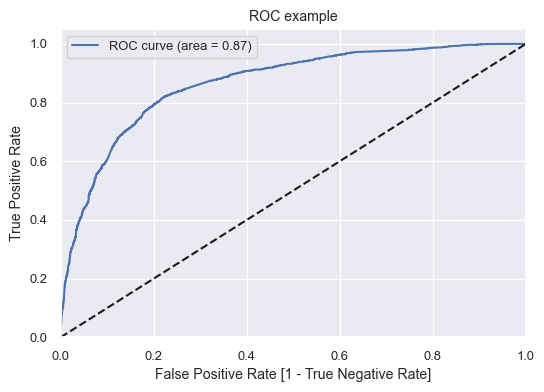

In [138]:
Curve_Roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

***
### <font color = 'brown'>OUTCOME: </font> 

<font color = 'darkslategray'><b>
    The current Model is a good one as there is higher (0.87) area under the ROC curve
</b></font>
***

***
### <font color = 'brown'> Optimal Cutoff Point: </font>
<font color = 'darkslategray'><b>
An arbitrary cut-off value of 0.5 was chosen earlier. Now determining the best cut-off value.<br>
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity</b></font>

***

In [139]:
# Analysising optimal cutoff by creating different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)

In [140]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.170093,2973,0,1,1,0,0,0,0,0,0,0,0
1,0,0.503713,996,1,1,1,1,1,1,1,0,0,0,0
2,0,0.121508,9226,0,1,1,0,0,0,0,0,0,0,0
3,0,0.672895,4713,1,1,1,1,1,1,1,1,0,0,0
4,0,0.029495,8005,0,1,0,0,0,0,0,0,0,0,0


In [141]:
# Importing Confusion_matrix
from sklearn.metrics import confusion_matrix

In [142]:
# Analysisng accuracy sensitivity and specificity for various probability cutoffs.

Cut_off = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

num1 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num1:
    Metrics_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(Metrics_1))
    accuracy = (Metrics_1[0,0]+Metrics_1[1,1])/total1
    
    speci = Metrics_1[0,0]/(Metrics_1[0,0]+Metrics_1[0,1])
    sensi = Metrics_1[1,1]/(Metrics_1[1,0]+Metrics_1[1,1])
    Cut_off.loc[i] =[ i ,accuracy,sensi,speci]

In [143]:
# Displaying Cut_off
print(Cut_off)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.380413     1.000000     0.000000
0.1          0.1  0.597701     0.971026     0.368488
0.2          0.2  0.711541     0.909768     0.589835
0.3          0.3  0.788537     0.829056     0.763659
0.4          0.4  0.800189     0.766142     0.821093
0.5          0.5  0.801764     0.680050     0.876493
0.6          0.6  0.783026     0.559603     0.920203
0.7          0.7  0.758306     0.459023     0.942058
0.8          0.8  0.733900     0.353477     0.967471
0.9          0.9  0.688868     0.200745     0.988564


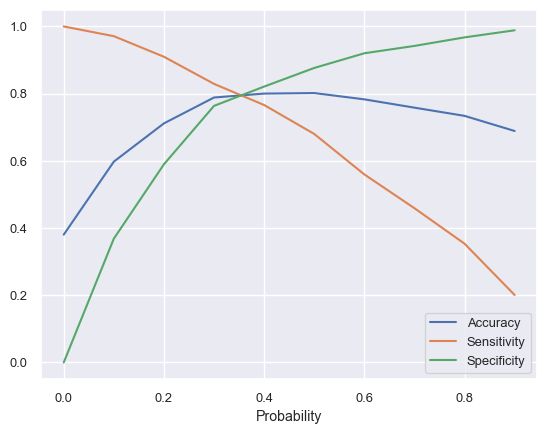

In [144]:
# Plotting accuracy sensitivity and specificity for various probabilities.
Cut_off.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

***
### <font color = 'brown'>OUTCOME: </font> 

<font color = 'darkslategray'><b>
    The optimum point of "0.34" can be considered as the cutoff probability.
</b></font>
***

In [145]:
# Taking "0.34" as cutoff probability

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.170093,2973,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.503713,996,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.121508,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.672895,4713,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.029495,8005,0,1,0,0,0,0,0,0,0,0,0,0


***
### <font color = 'brown'> Analysing Lead Score to Training data: </font>

***

In [146]:
# Lead Score to Training data analysis
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

In [147]:
# Displaying output result
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.170093,2973,0,1,1,0,0,0,0,0,0,0,0,0,17
1,0,0.503713,996,1,1,1,1,1,1,1,0,0,0,0,1,50
2,0,0.121508,9226,0,1,1,0,0,0,0,0,0,0,0,0,12
3,0,0.672895,4713,1,1,1,1,1,1,1,1,0,0,0,1,67
4,0,0.029495,8005,0,1,0,0,0,0,0,0,0,0,0,0,3


***
## <font color = 'brown'> Model Evaluation </font>

***

***
### <font color = 'brown'>1. Overall Accuracy: </font>

***

In [148]:
overall_accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print("Accuracy:",round(overall_accuracy,4))

Accuracy: 0.7945


***
### <font color = 'brown'>2. Confusion Matrix: </font>

***

In [149]:
conf_metrics = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print("Confusion Matrix:\n",conf_metrics)

Confusion Matrix:
 [[3103  832]
 [ 473 1943]]


In [151]:
TP = conf_metrics[1,1] # True Positive 
TN = conf_metrics[0,0] # True Negatives
FP = conf_metrics[0,1] # False Positives
FN = conf_metrics[1,0] # False Negatives

In [153]:
print("True Positive:",TP)
print("True Negaative:",TN)
print("False Positive:",FP)
print("False Negative:",FN)

True Positive: 1943
True Negaative: 3103
False Positive: 832
False Negative: 473


***
### <font color = 'brown'>2. Confusion Matrix: </font>

***

***
### <font color = 'brown'> a) <u>Sensitivity | Specificity | False Positive Rate</u>: </font>
***

In [154]:
# Sensitivity logistic regression model
print("Sensitivity : ",round(TP / float(TP+FN),4))

# Specificity logistic regression model
print("Specificity : ",round(TN / float(TN+FP),4))

# False Postive Rate: predicting converted lead when the lead actually was not converted
print("False Positive Rate :",round(FP/ float(TN+FP),4))

Sensitivity :  0.8042
Specificity :  0.7886
False Positive Rate : 0.2114


***
### <font color = 'brown'>b) <u>Positive & Negative Predictive Value</u> </font>
<font color = 'darkslategray'><b> </b></font>
***

In [155]:
# positive predictive value 
print("Positive Predictive Value :",round(TP / float(TP+FP),4))

# Negative predictive value
print ("Negative predictive value :",round(TN / float(TN+ FN),4))

Positive Predictive Value : 0.7002
Negative predictive value : 0.8677


***
## <font color = 'brown'>Precision and Recall: </font> 
<font color ="darkslategray"><b>1. Precision: Positive Predictive Value which refers to the percentage of relevant results.<br>
2. Recall: Sensitivity which refers to the percentage of total relevant results correctly classified by the algorithm.
</b></font>
***

In [157]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3449,  486],
       [ 773, 1643]], dtype=int64)

***
### <font color = 'brown'> a) Precision: </font> <font color = "darkslategray">(TP/TP+FP)</font>
***

In [159]:
Precision_Value = confusion[1,1]/(confusion[0,1]+confusion[1,1])
print("Precision : ", round(Precision_Value,4))

Precision :  0.7717


***
### <font color = 'brown'> b) Recall: </font> <font color = "darkslategray">TP / TP + FN</font>
***

In [160]:
Recall_Value = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print("Recall :",round(Recall_Value,4))

Recall : 0.68


***
### <font color = 'brown'> c) Precision & Recall Using "sklearn.metrics"</font>
***

In [161]:
#Importing "Precision_score" and "Recaall_score"
from sklearn.metrics import precision_score, recall_score

# Precision Score
print("Precision :",round(precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted),4))

#Recall Score
print("Recall :",round(recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted),4))

Precision : 0.7717
Recall : 0.68


***
## <font color = 'brown'>Tradeoff: Precision and Recall </font> 
***

In [162]:
# Importing "precision_recall_curve" from "sklearn.metrics"
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       0
        ..
 6346    1
 6347    1
 6348    1
 6349    1
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [163]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

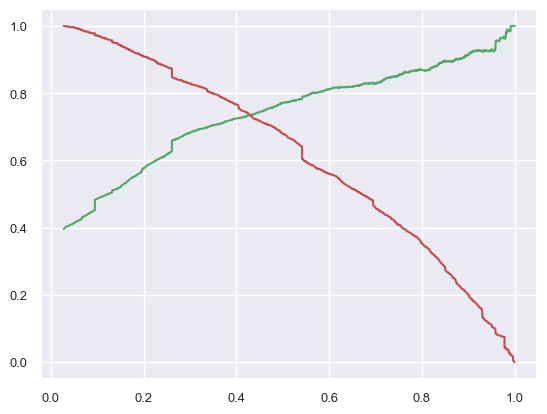

In [164]:
# Trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

***
## <font color = 'brown'>Test Set Prediction </font> 
***

***
### <font color = 'brown'>a) Scaling Test Data </font> 
***

In [165]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [167]:
# Assigning columns selected by the final model to the X_test 
X_test = X_test[Rfe_Cols1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Others,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3229,0,0.766631,0,0,0,0,0,1,0,0,0
1464,0,1.175088,0,0,0,0,0,1,0,0,0
7954,0,-0.539334,0,0,0,1,0,0,1,0,0
4180,0,2.510358,0,0,0,1,0,0,0,1,0
3788,0,-0.134540,0,0,0,0,0,0,0,1,0


In [168]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

# Predictions on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3229    0.779019
1464    0.846832
7954    0.115072
4180    0.756437
3788    0.104189
1775    0.091342
6512    0.994538
4784    0.261032
4187    0.162700
4677    0.265272
dtype: float64

In [170]:
# Converting 'y_test_pred' to a dataframe array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3229,0.779019
1464,0.846832
7954,0.115072
4180,0.756437
3788,0.104189


In [171]:
# Converting "y_test" to dataframe
y_test_df = pd.DataFrame(y_test)

# Assigning "Prospect ID" to index
y_test_df['Prospect ID'] = y_test_df.index

In [172]:
# Removing index for dataframes
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [178]:
# Appending "y_test_df" and "y_pred_1"
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head(10)

,Converted,Prospect ID,0
0,1,3229,0.779019
1,1,1464,0.846832
2,0,7954,0.115072
3,0,4180,0.756437
4,0,3788,0.104189
5,0,1775,0.091342
6,1,6512,0.994538
7,0,4784,0.261032
8,0,4187,0.162700
9,0,4677,0.265272


In [179]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probability'})

# Re-arranging the columns of "y_pred_final" data frame
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_Probability'])

# Displaying "y_pred_final"
y_pred_final.head(10)

,Prospect ID,Converted,Converted_Probability
0,3229,1,0.779019
1,1464,1,0.846832
2,7954,0,0.115072
3,4180,0,0.756437
4,3788,0,0.104189
5,1775,0,0.091342
6,6512,1,0.994538
7,4784,0,0.261032
8,4187,0,0.162700
9,4677,0,0.265272


In [181]:
# Final Prediction with "0.34" cutoff
y_pred_final['Final_Prediction'] = y_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head(10)

,Prospect ID,Converted,Converted_Probability,Final_Prediction
0,3229,1,0.779019,1
1,1464,1,0.846832,1
2,7954,0,0.115072,0
3,4180,0,0.756437,1
4,3788,0,0.104189,0
5,1775,0,0.091342,0
6,6512,1,0.994538,1
7,4784,0,0.261032,0
8,4187,0,0.162700,0
9,4677,0,0.265272,0


In [189]:
# Overall accuracy.
print("Accuracy :",round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Prediction),4))

# Print confusion metrics
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Prediction )
print("\nConfusion Metrics:\n",confusion2)


Accuracy : 0.7995

Confusion Metrics:
 [[1353  351]
 [ 195  824]]


In [192]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Sensitivity of our logistic regression model
print("Sensitivity :",round(TP / float(TP+FN),4))


# Let us calculate specificity
print("Specificity :",round(TN / float(TN+FP),4))


Sensitivity : 0.8086
Specificity : 0.794


### <font color ="brown"> Assigning Lead Score to the Testing data </font>

In [195]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Probability.map( lambda x: round(x*100))

y_pred_final.head(10)

,Prospect ID,Converted,Converted_Probability,Final_Prediction,Lead_Score
0,3229,1,0.779019,1,78
1,1464,1,0.846832,1,85
2,7954,0,0.115072,0,12
3,4180,0,0.756437,1,76
4,3788,0,0.104189,0,10
5,1775,0,0.091342,0,9
6,6512,1,0.994538,1,99
7,4784,0,0.261032,0,26
8,4187,0,0.162700,0,16
9,4677,0,0.265272,0,27


## <font color ="brown"> Outcome: </font>

<font color ="darkslategray"><b>
After running the model on the Test Data , we obtain:<p>
Accuracy : 79.9 %<br>
Sensitivity : 80.8 %<br>
Specificity : 79.4 %
    
</b></font>

## <font color ="brown"> <u>RESULT</u> </font>

1) Comparing the values obtained for Train & Test:<p>

<p>
Train Data:<br>
Accuracy : 81.0 %<br>
Sensitivity : 81.7 %<br>
Specificity : 80.6 %<br>

<p>

Test Data:<br>
Accuracy : 80.4 %<br>
Sensitivity : 80.4 %<br>
Specificity : 80.5 %<br>
    
<p>
Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

2) Finding out the leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [198]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_Probability,Final_Prediction,Lead_Score
1,1464,1,0.846832,1,85
6,6512,1,0.994538,1,99
11,4173,1,0.904545,1,90
16,1922,1,0.929336,1,93
23,5814,0,0.847603,1,85
...,...,...,...,...,...
2685,6143,1,0.995968,1,100
2700,1035,1,0.883166,1,88
2718,836,0,0.887632,1,89
2720,6506,1,0.929336,1,93


So there are 368 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [201]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1464, 6512, 4173, 1922, 5814, 4925,  664, 4331, 2237, 7566, 7366,
       7240, 6839, 6961, 7562,  448, 1559, 5495, 1107, 2144, 7268, 4054,
         64, 6572, 5628, 3981, 6811, 2344, 5470, 6257, 1049, 6538, 5497,
       1918,  935, 9140, 7673, 4113,   81, 6466, 2962, 5727, 3762, 2652,
        248, 2931, 6926, 3569, 6978, 1296, 6115, 4944,   55, 6963,  181,
       1496, 5436,  358, 1275, 3272,  813, 1477, 1851, 6921, 6518, 4184,
         23, 1631, 3344, 6249, 7426,   66, 7288, 5095, 6789, 2375,  541,
       1641, 3943, 4451,  361, 7017, 5199, 1059,  948, 7574, 7337,   62,
       5414, 6964, 1953, 7195,  857, 1246, 5862, 6745, 2453, 1784, 5626,
       6826, 6445, 4756, 6653, 2463, 1290, 1532, 6537, 2467, 1014, 1166,
        841, 1236,  261, 6426, 6285, 7200, 6242, 7802, 6758, 8211,  362,
        431, 6079, 2398, 7551, 2282, 6510, 6488, 6902, 2980, 1225, 3190,
       5835, 4943, 6932, 7133, 6544, 3984, 7053,   48, 5391, 7168, 6777,
       6977, 2387, 5153, 5618, 1942, 1392, 5207, 69

3) Finding out the Important Features from our final model:

In [203]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                     6.731704
Lead Source_Reference                            4.352025
Last Activity_Other_Activity                     3.088740
Last Activity_SMS Sent                           1.577920
Lead Source_Olark Chat                           1.388814
Total Time Spent on Website                      1.101740
Last Activity_Email Opened                       0.370774
Specialization_Others                           -0.653931
Last Notable Activity_Modified                  -0.840701
const                                           -1.162591
Last Notable Activity_Olark Chat Conversation   -1.227448
Do Not Email                                    -1.507951
dtype: float64

<font color = 'brown'><b> Recommendations:</b></font>
<p>
<font color='darkslategray'><b>
1. The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
<br>
2. The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
<br>
3. The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.<br>
4. The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
<br>
5. The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.
<br>
6. The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.
<br>
7. The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
<br>
8. The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.
<br>
The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.
<br>
</b></font>